## Exercise 4.10

### Importing Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1. Importing Dataset

In [5]:
# Create file path
path = r'/Users/gre604/Desktop/30-05-2024 Instacart Basket Analysis'

In [6]:
# Import Dataset
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'agg_cust_ords_prods_merge.pkl'))

In [12]:
# Check results
df.head()

,user_id,gender,state,age,date_joined,number_of_dependents,family_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


### 2. Check for PPI Data

In [14]:
# Check for data fields that contain PII information
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependents', 'family_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'first_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_orders', 'loyalty_flag', 'average_spend',
       'spending_flag', 'customer_frequency', 'frequency_flag', '_merge'],
      dtype='object')

#### Based on the dataset, there isn't any sensitive PII data such as names, addresses, or email addresses.

### 3. Create Region Column

In [119]:
# Create regions list
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
             'Pennsylvania', 'New Jersey']


Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
           'Kansas', 'Minnesota', 'Iowa', 'Missouri']


South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
         'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
        'Washington', 'Oregon', 'California', 'Hawaii']

In [121]:
# Create Regions Column
df.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(South), 'region'] = 'South'
df.loc[df['state'].isin(West), 'region'] = 'West'

In [19]:
# Check results
df.head()

,user_id,gender,state,age,date_joined,number_of_dependents,family_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [20]:
# Crosstab to see spending differences by region
pd.crosstab(df['region'], df['spending_flag'])

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108200,5614536
South,209610,10582275
West,160328,8132585


Text(0.5, 1.0, 'Spending by Region')

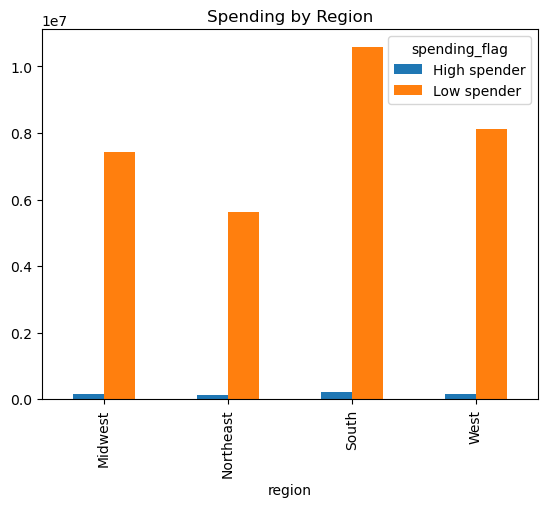

In [21]:
# Create bar chart to see spending differences by region
pd.crosstab(df['region'], df['spending_flag']).plot.bar().set_title('Spending by Region')

#### The high and low spending customers tend to be more in the South and West regions, while there are less customers residing in the Midwest and Northeast. 

### 4. Create exclusion flag for low-activity customers with less than 5 orders

In [24]:
# Create exclustion flag for low-activity customers
df.loc[df['max_orders'] < 5, 'customer_activity'] = 'Low-activity'
df.loc[df['max_orders'] >= 5, 'customer_activity'] = 'High-activity'

In [25]:
# Check results
df.head()

,user_id,gender,state,age,date_joined,number_of_dependents,family_status,income,product_id,product_name,...,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,_merge,region,customer_activity
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High-activity
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High-activity
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High-activity
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High-activity
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest,High-activity


In [26]:
# Exclude low-activity records from dataset
high_activity = df[df['customer_activity'] != 'Low-activity']

In [27]:
# Check results
high_activity['customer_activity'].value_counts(dropna = False)

customer_activity
High-activity    30964564
Name: count, dtype: int64

In [28]:
# Drop customer_activity column
del high_activity['customer_activity']

In [29]:
high_activity.head()

,user_id,gender,state,age,date_joined,number_of_dependents,family_status,income,product_id,product_name,...,busiest_days,busiest_period_of_day,max_orders,loyalty_flag,average_spend,spending_flag,customer_frequency,frequency_flag,_merge,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both,Midwest


In [30]:
high_activity.shape

(30964564, 33)

In [31]:
# Export new dataframe based on high-activity only
high_activity.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_high_activity.pkl'))

### 5. Create Customer Profiling Variables

In [10]:
# Create age class profile column
df.loc[df['age'] < 30, 'age_group'] = 'Young-adult'
df.loc[(df['age'] >= 30) & (df['age'] < 60), 'age_group'] = 'Middle-aged'
df.loc[df['age'] >= 60, 'age_group'] = 'Senior'

In [11]:
# Create income group
df.loc[df['income'] <= 60000, 'income_group'] = 'Lower class'
df.loc[(df['income'] > 60000) & (df['income'] <= 153000), 'income_group'] = 'Middle class'
df.loc[df['income'] > 153000, 'income_group'] = 'Upper class'

In [12]:
# Create number of dependents group
df.loc[df['number_of_dependents'] == 0, 'dependent_status'] = 'Single'
df.loc[df['number_of_dependents'] == 1, 'dependent_status'] = 'Married'
df.loc[(df['number_of_dependents'] > 1) & (df['number_of_dependents'] <= 3), 'dependent_status'] = 'Family'

In [13]:
# Create day of week name column
df.loc[df['orders_day_of_week'] == 0, 'day_of_week_name'] = 'Saturday'
df.loc[df['orders_day_of_week'] == 1, 'day_of_week_name'] = 'Sunday'
df.loc[df['orders_day_of_week'] == 2, 'day_of_week_name'] = 'Monday'
df.loc[df['orders_day_of_week'] == 3, 'day_of_week_name'] = 'Tuesday'
df.loc[df['orders_day_of_week'] == 4, 'day_of_week_name'] = 'Wednesday'
df.loc[df['orders_day_of_week'] == 5, 'day_of_week_name'] = 'Thursday'
df.loc[df['orders_day_of_week'] == 6, 'day_of_week_name'] = 'Friday'

In [14]:
# Create hour of day column 
df.loc[df['order_hour_of_day']< 12,'hour_of_day_group']='Morning'
df.loc[(df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] <= 17), 'hour_of_day_group'] = 'Afternoon'
df.loc[df['order_hour_of_day'] > 17, 'hour_of_day_group'] = 'Evening'

In [15]:
# Create weekday/weekend column
df.loc[df['orders_day_of_week'].isin([0,1]), 'week_category'] = 'Weekend'
df.loc[df['orders_day_of_week'].isin([2,3,4,5,6]), 'week_category'] = 'Weekday'

In [39]:
df['week_category'].value_counts(dropna = False)

week_category
Weekday    20540447
Weekend    11864412
Name: count, dtype: int64

### 6. Create an appropriate visualization to show the distribution of profiles.

#### Profile based on Age Group

In [42]:
df['age_group'].value_counts(dropna = False)

age_group
Middle-aged    15247163
Senior         11067255
Young-adult     6090441
Name: count, dtype: int64

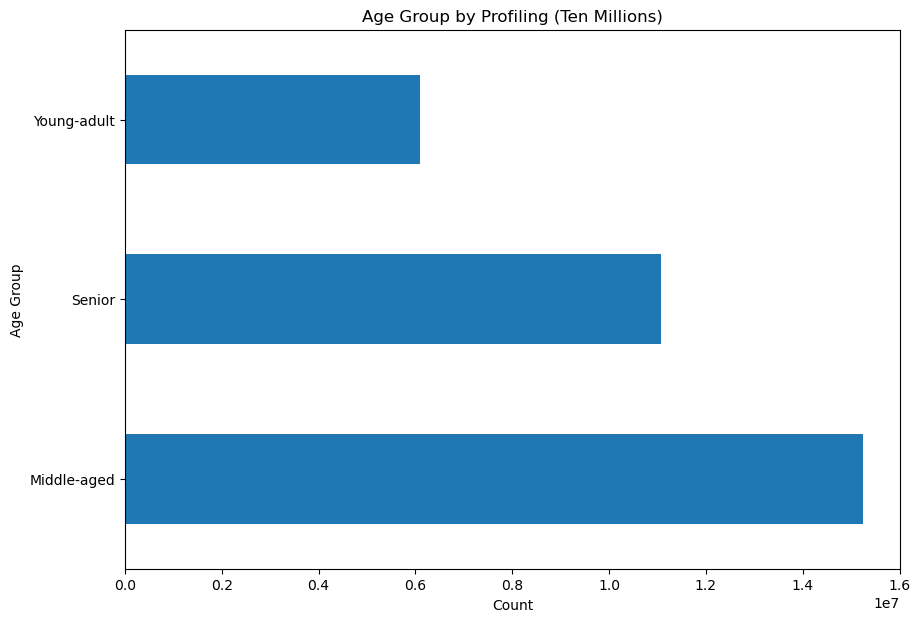

In [257]:
# Create bar chart to show distribution of age class
plt.figure(figsize = (10,7))
age_group_bar = df['age_group'].value_counts().plot(kind = 'barh')
plt.title('Age Group by Profiling (Ten Millions)')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()

In [259]:
age_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_bar.png'))

<Axes: ylabel='Frequency'>

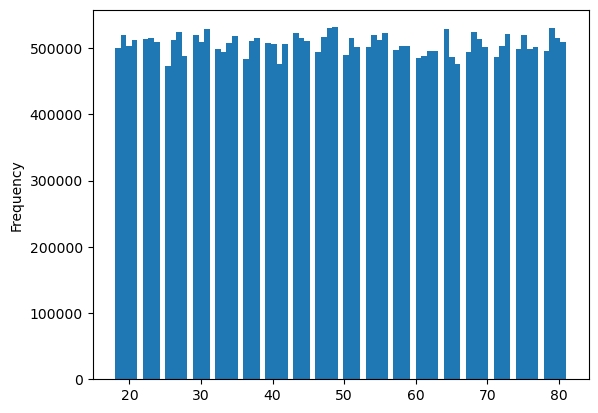

In [45]:
# Create age histogram
age_hist = df['age'].plot.hist(bins=81)
age_hist

In [46]:
age_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_hist.png'))

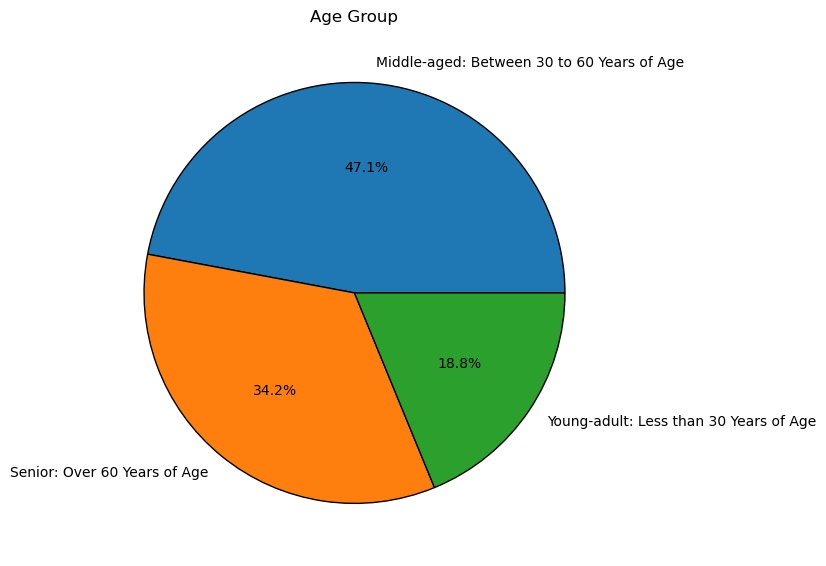

In [47]:
# Creating Pie Chart of Age Groups
age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8,8))
age_group_pie_chart=age_group_counts.plot.pie(labels=('Middle-aged: Between 30 to 60 Years of Age','Senior: Over 60 Years of Age','Young-adult: Less than 30 Years of Age'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Age Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [48]:
age_group_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_pie_chart.png'))

#### Profile based on Income Group

In [50]:
# check income group value counts
df['income_group'].value_counts(dropna = False)

income_group
Middle class    22750342
Lower class      6160692
Upper class      3493825
Name: count, dtype: int64

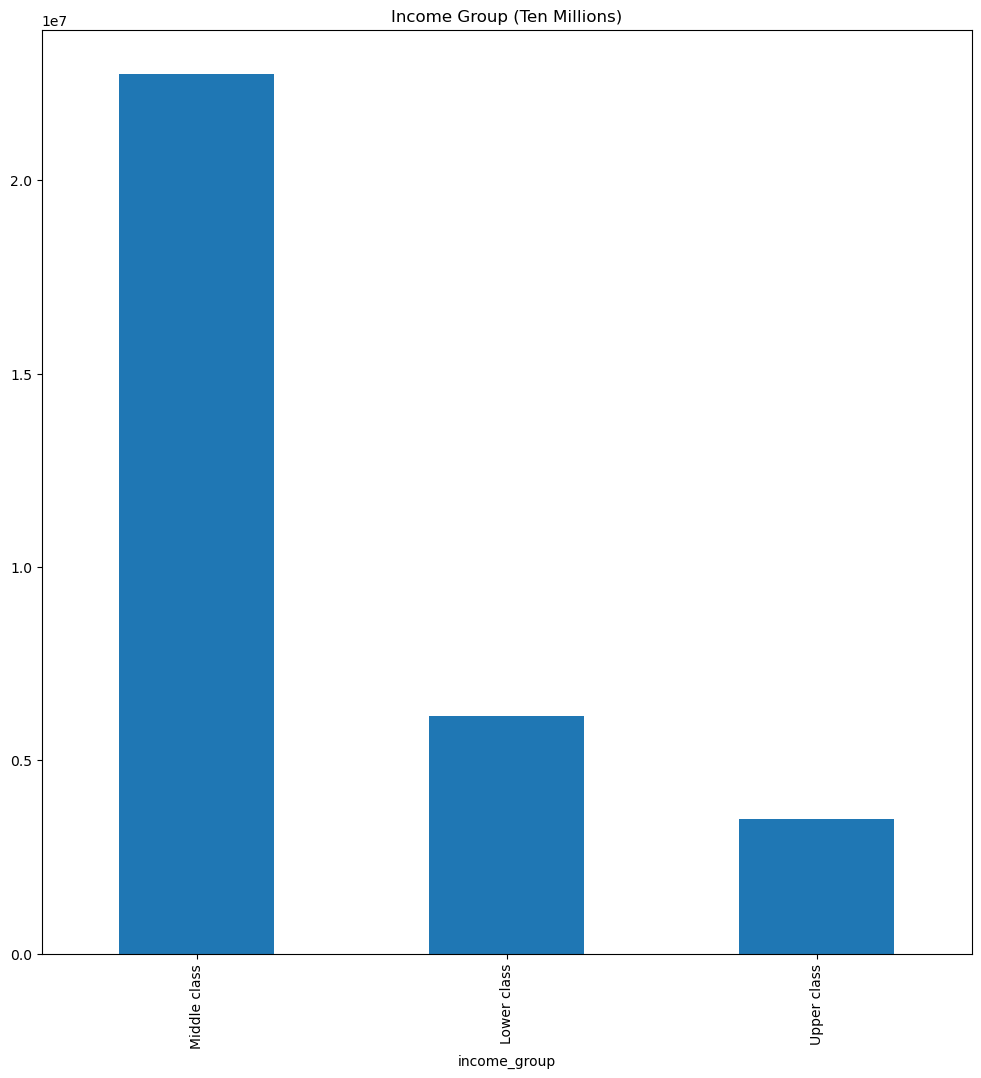

In [287]:
# Create bar chart to show income group distribution
plt.figure(figsize=(12,12))
income_group_bar = df['income_group'].value_counts().plot(kind = 'bar')
plt.title('Income Group (Ten Millions)')
plt.show()

In [289]:
income_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_bar.png'))

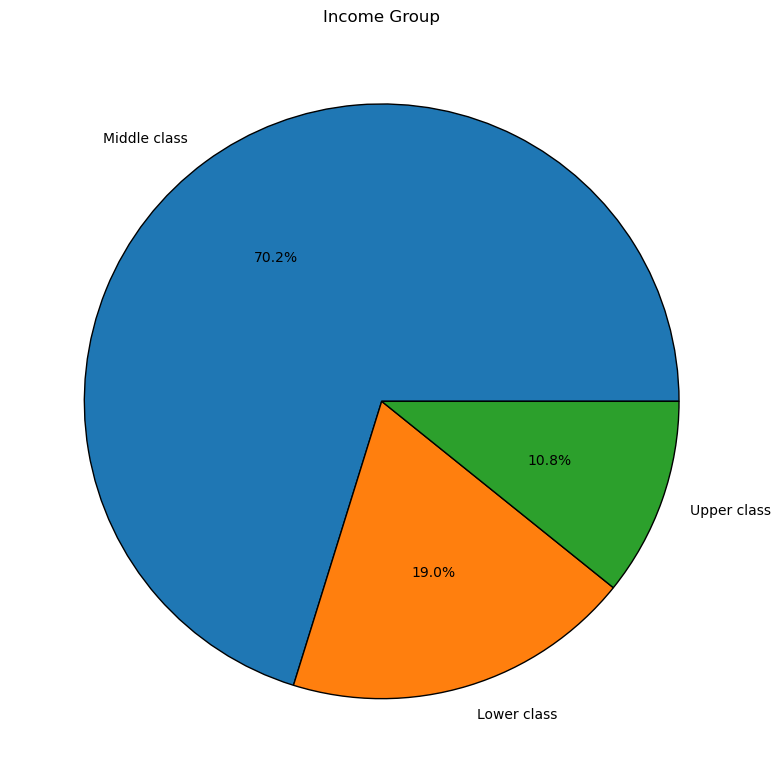

In [53]:
# Creating Pie Chart of Income Groups
income_group_counts = df['income_group'].value_counts()
plt.figure(figsize=(8,8))
income_group_pie_chart=income_group_counts.plot.pie(labels=('Middle class','Lower class','Upper class'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Income Group')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [54]:
income_group_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_pie_chart.png'))

#### Profile based on Number of Dependents

In [56]:
df['number_of_dependents'].value_counts(dropna = False)

number_of_dependents
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Dependents Frequency (millions)')

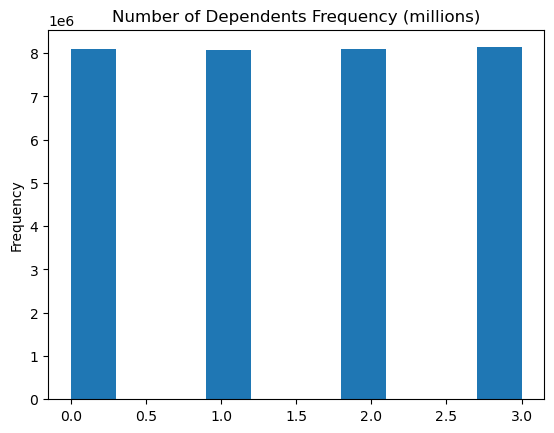

In [57]:
# Create histogram for number of dependents frequency
number_of_dep_hist = df['number_of_dependents'].plot.hist().set_title('Number of Dependents Frequency (millions)')
number_of_dep_hist

In [58]:
number_of_dep_hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'number_of_dep_hist.png'))

In [59]:
# Check distribution of values
df['dependent_status'].value_counts(dropna = False)

dependent_status
Family     16226252
Single      8097503
Married     8081104
Name: count, dtype: int64

Text(0.5, 1.0, 'Dependent Status Profiling (ten millions)')

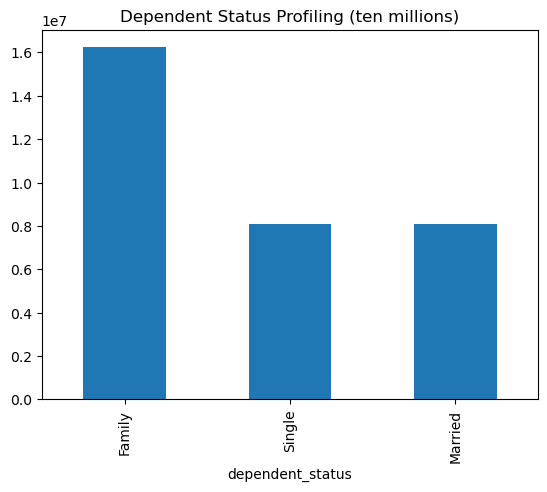

In [60]:
# Create bar chart for dependent status
dependent_group_bar = df['dependent_status'].value_counts().plot.bar().set_title('Dependent Status Profiling (ten millions)')
dependent_group_bar

In [61]:
dependent_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependent_group_bar.png'))

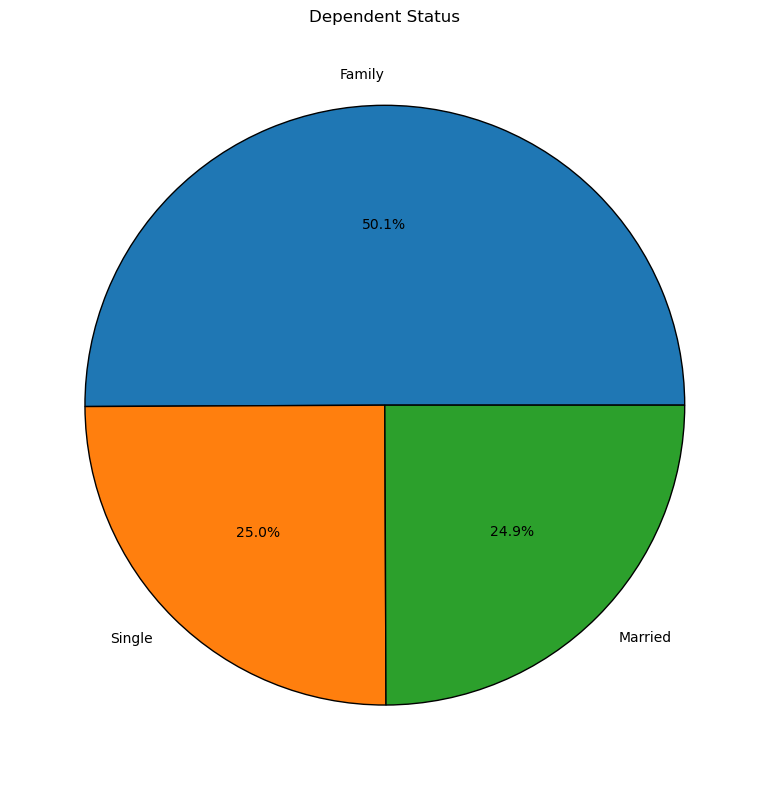

In [62]:
# Creating Pie Chart of Dependent Status
dependent_group_counts = df['dependent_status'].value_counts()
plt.figure(figsize=(8,8))
dependent_group_pie_chart=dependent_group_counts.plot.pie(labels=('Family','Single','Married'), 
                          autopct='%.1f%%',
                          wedgeprops={'edgecolor':'black'})
plt.title('Dependent Status')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [63]:
dependent_group_pie_chart.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependent_group_pie_chart.png'))

#### Profiling Orders Day of Week

In [65]:
# Check distribution for day of week name
df['day_of_week_name'].value_counts(dropna = False)

day_of_week_name
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

Text(0.5, 1.0, 'Day of Week Profiling (millions)')

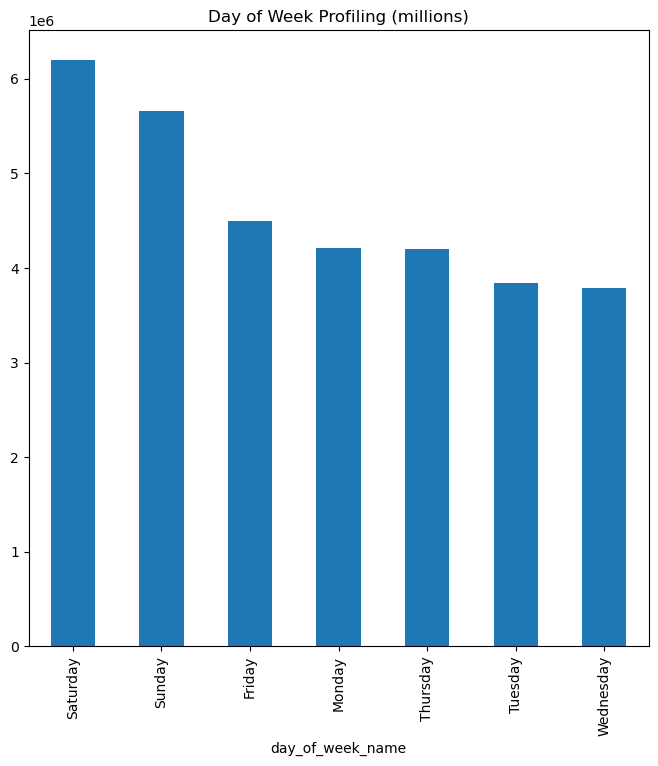

In [30]:
# Create bar chart for day week name

plt.figure(figsize = (8,8))
day_week_name_bar = df['day_of_week_name'].value_counts().plot.bar().set_title('Day of Week Profiling (millions)')
day_week_name_bar

In [32]:
day_week_name_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'day_week_name_bar.png'))

In [68]:
# Check distribution of weekday/weekend
df['week_category'].value_counts(dropna = False)

week_category
Weekday    20540447
Weekend    11864412
Name: count, dtype: int64

Text(0.5, 1.0, 'Week Category Profiling (ten millions)')

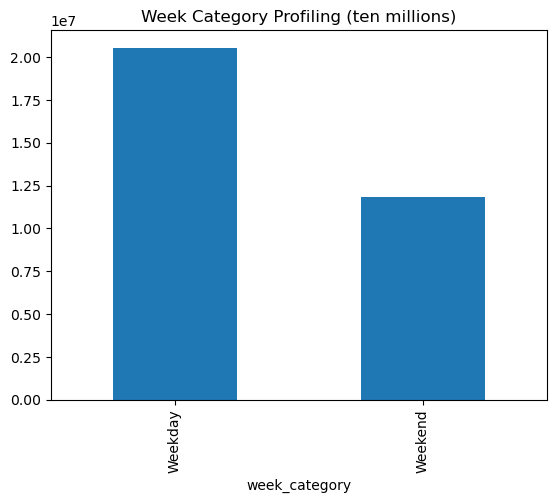

In [69]:
# Create bar chart for weekday/weekend
week_category_bar = df['week_category'].value_counts().plot.bar().set_title('Week Category Profiling (ten millions)')
week_category_bar

In [70]:
week_category_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'week_category_bar.png'))

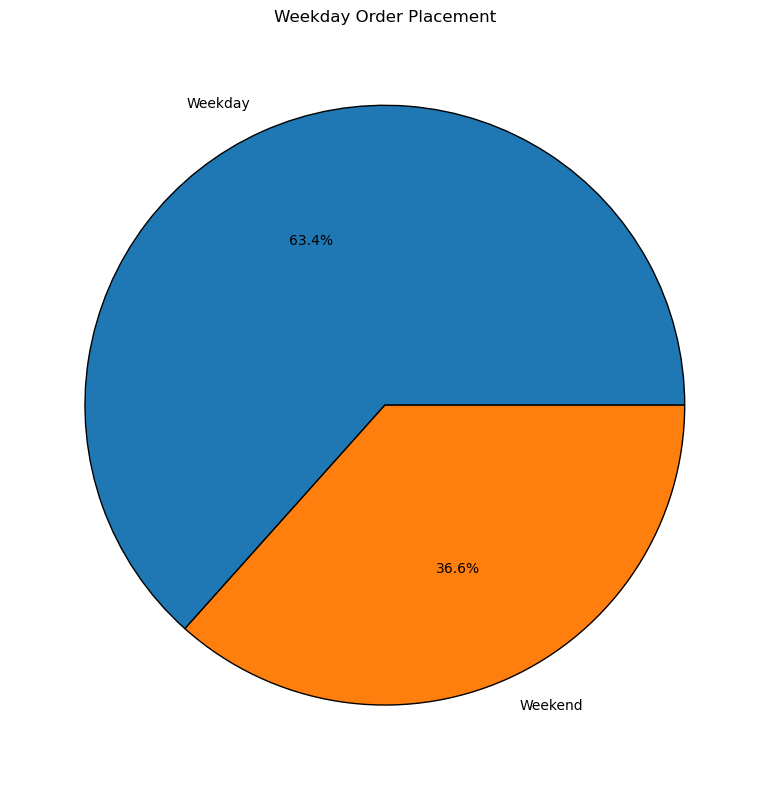

In [71]:
# Creating Pie Chart of Weekday
week_day_count = df['week_category'].value_counts()
plt.figure(figsize=(8,8))
week_day_order_count_pie=week_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Weekday Order Placement')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [72]:
week_day_order_count_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'week_day_order_count_pie.png'))

#### Profiling Hour of Day

In [74]:
# Check distribution of hour of day group
df['hour_of_day_group'].value_counts(dropna = False)

hour_of_day_group
Afternoon    15253622
Morning      11448096
Evening       5703141
Name: count, dtype: int64

Text(0.5, 1.0, 'Time of Day for Orders (in ten millions)')

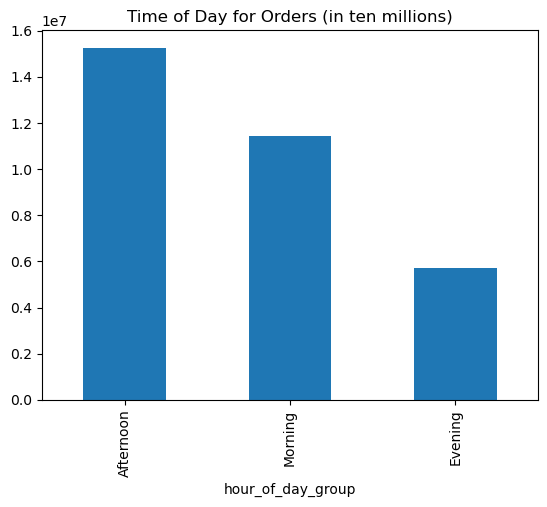

In [75]:
hour_of_day_bar = df['hour_of_day_group'].value_counts().plot.bar().set_title('Time of Day for Orders (in ten millions)')
hour_of_day_bar

In [76]:
hour_of_day_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hour_of_day_bar.png'))

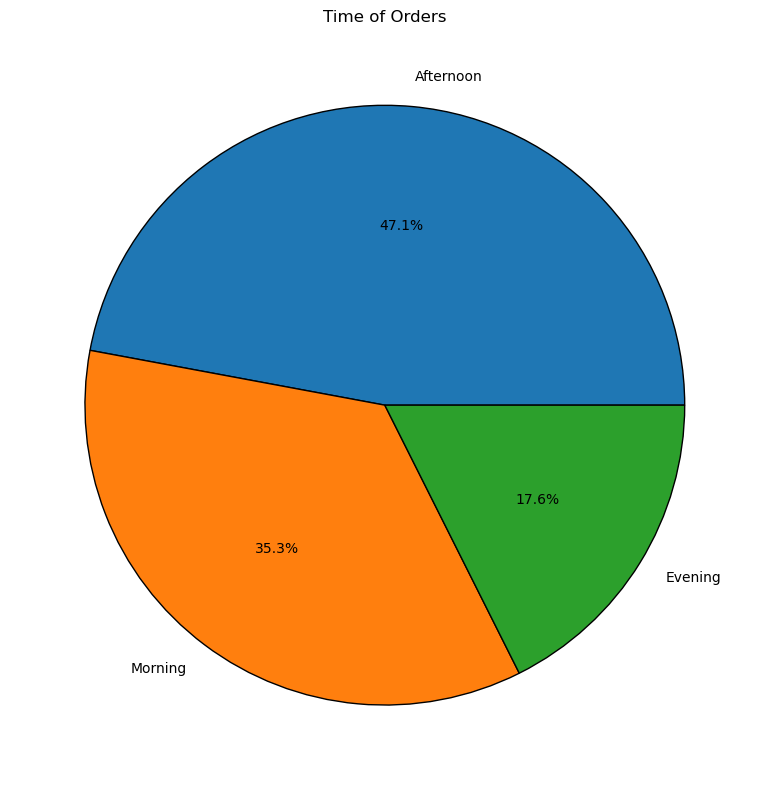

In [77]:
# Creating Pie Chart of Time of Orders
hour_of_day_count = df['hour_of_day_group'].value_counts()
plt.figure(figsize=(8,8))
hour_of_day_count_pie=hour_of_day_count.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Time of Orders')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [78]:
hour_of_day_count_pie.figure.savefig(os.path.join(path,'Analysis','Visualizations','hour_of_day_count_pie.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [80]:
df.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_orders',
 'loyalty_flag',
 'average_spend',
 'spending_flag',
 'customer_frequency',
 'frequency_flag',
 '_merge',
 'region',
 'customer_activity',
 'age_group',
 'income_group',
 'dependent_status',
 'day_of_week_name',
 'hour_of_day_group',
 'week_category']

In [81]:
# Creating aggregation subset of customer profile
cust_profile_agg = df.groupby(['user_id','order_number','days_since_prior_order','loyalty_flag','spending_flag','customer_frequency','state','region','customer_activity','age_group','income','income_group','dependent_status','week_category','orders_day_of_week','hour_of_day_group','order_hour_of_day'])['prices'].sum().reset_index()

In [82]:
# Check results
cust_profile_agg.head()

,user_id,order_number,days_since_prior_order,loyalty_flag,spending_flag,customer_frequency,state,region,customer_activity,age_group,income,income_group,dependent_status,week_category,orders_day_of_week,hour_of_day_group,order_hour_of_day,prices
0,1,2,15.0,New customer,Low spender,20.5,Alabama,South,High-activity,Middle-aged,40423,Lower class,Family,Weekday,3,Morning,7,35.4
1,1,3,21.0,New customer,Low spender,20.5,Alabama,South,High-activity,Middle-aged,40423,Lower class,Family,Weekday,3,Afternoon,12,28.2
2,1,4,29.0,New customer,Low spender,20.5,Alabama,South,High-activity,Middle-aged,40423,Lower class,Family,Weekday,4,Morning,7,26.0
3,1,5,28.0,New customer,Low spender,20.5,Alabama,South,High-activity,Middle-aged,40423,Lower class,Family,Weekday,4,Afternoon,15,57.0
4,1,6,19.0,New customer,Low spender,20.5,Alabama,South,High-activity,Middle-aged,40423,Lower class,Family,Weekday,2,Morning,7,25.0


In [83]:
cust_profile_agg.shape

(3008486, 18)

In [84]:
# Creating subset of user focused breakdown
user_agg = cust_profile_agg.groupby('user_id').agg({'order_number': ['mean', 'min', 'max'],'days_since_prior_order': ['mean', 'min', 'max'],
                                        'orders_day_of_week': ['mean', 'min', 'max'],'order_hour_of_day': ['mean', 'min', 'max'],
                                        'prices': ['mean', 'min', 'max'],'income':['mean','min','max']})

In [85]:
user_agg

order_number         days_since_prior_order              \
                mean min max                   mean   min   max   
user_id                                                           
1                6.0   2  10              19.555556   0.0  30.0   
2                8.0   2  14              15.230769   3.0  30.0   
3                7.0   2  12              12.090909   7.0  21.0   
4                3.5   2   5              13.750000   0.0  21.0   
5                3.0   2   4              13.333333  10.0  19.0   
...              ...  ..  ..                    ...   ...   ...   
206205           2.5   2   3              20.000000  10.0  30.0   
206206          34.5   2  67               3.772727   0.0  15.0   
206207           9.0   2  16              14.333333   1.0  30.0   
206208          25.5   2  49               7.437500   0.0  20.0   
206209           7.5   2  13              17.500000   3.0  30.0   

        orders_day_of_week         order_hour_of_day              prices  \
                      mean min max              mean min max        mean   
user_id                                                                    
1                 2.555556   1   4         10.555556   7  16   38.233333   
2                 2.153846   1   5         10.538462   9  15  106.169231   
3                 1.090909   0   3         16.636364  15  19   58.872727   
4                 4.500000   4   5         13.000000  11  15   26.625000   
5                 1.333333   0   3         17.333333  16  18   81.166667   
...                    ...  ..  ..               ...  ..  ..         ...   
206205            3.500000   2   5         15.500000  15  16   68.000000   
206206            2.469697   0   6         16.712121   9  20   32.362121   
206207            2.333333   0   6         12.066667   4  21   95.340000   
206208            2.687500   0   6         14.250000   4  23  116.100000   
206209            2.750000   0   5         13.833333  10  18   68.166667   

                        income                  
          min    max      mean     min     max  
user_id                                         
1        25.0   63.1   40423.0   40423   40423  
2        19.0  213.1   64940.0   64940   64940  
3        30.7  107.2   93240.0   93240   93240  
4        10.8   63.4   45435.0   45435   45435  
5        43.6  118.4  115242.0  115242  115242  
...       ...    ...       ...     ...     ...  
206205   51.6   84.4   99402.0   99402   99402  
206206    9.6  157.3   75041.0   75041   75041  
206207   42.8  196.9  110135.0  110135  110135  
206208   38.7  238.5  156838.0  156838  156838  
206209   11.1  131.5  137969.0  137969  137969  

[206208 rows x 18 columns]

In [86]:
# Creating aggregation by age_group for days_since_prior_order & prices
age_group_agg=cust_profile_agg.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [87]:
age_group_agg

days_since_prior_order                 prices               
                              mean  min   max        mean  min       max
age_group                                                               
Middle-aged              10.698601  0.0  30.0  121.722810  1.0  100442.8
Senior                   10.706859  0.0  30.0  118.182094  1.0  100452.9
Young-adult              10.729148  0.0  30.0  122.973679  1.0  100311.3

In [88]:
# Creating aggregation by income_group for days_since_prior_order & prices
income_group_agg=cust_profile_agg.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [89]:
income_group_agg

days_since_prior_order                 prices               
                               mean  min   max        mean  min       max
income_group                                                             
Lower class               11.279982  0.0  30.0   60.204679  1.0   15189.9
Middle class              10.563591  0.0  30.0  103.243387  1.0  100384.5
Upper class               10.398229  0.0  30.0  366.945056  1.0  100452.9

In [90]:
# Creating aggregation by week_day_category group for days_since_prior_order & prices
week_category_agg=cust_profile_agg.groupby('week_category').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [91]:
week_category_agg

days_since_prior_order                 prices               
                                mean  min   max        mean  min       max
week_category                                                             
Weekday                    10.479112  0.0  30.0  119.016233  1.0  100403.8
Weekend                    11.138152  0.0  30.0  124.008368  1.0  100452.9

In [92]:
# Creating aggregation by hour of day group for days_since_prior_order & prices
hour_of_day_group_agg=cust_profile_agg.groupby('hour_of_day_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max']})

In [93]:
hour_of_day_group_agg

days_since_prior_order                 prices               
                                    mean  min   max        mean  min       max
hour_of_day_group                                                             
Afternoon                      10.836544  0.0  30.0  121.307800  1.0  100452.9
Evening                        10.587939  0.0  30.0  116.803526  1.0  100301.1
Morning                        10.593427  0.0  30.0  121.961765  1.0  100322.1

In [94]:
df.describe()

,user_id,age,number_of_dependents,income,product_id,aisle_id,department_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,max_orders,average_spend,customer_frequency
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240485e+07
mean,1.029372e+05,4.946527e+01,1.501896e+00,9.943773e+04,2.559866e+04,7.119612e+01,9.919792e+00,1.198023e+01,1.710745e+06,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,8.352547e+00,5.895873e-01,3.305217e+01,1.198023e+01,1.039776e+01
std,5.946610e+04,1.848558e+01,1.118865e+00,4.305727e+04,1.408400e+04,3.821139e+01,6.281485e+00,4.956554e+02,9.872988e+05,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,7.127071e+00,4.919087e-01,2.515525e+01,8.324227e+01,7.131754e+00
min,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,5.142200e+04,3.300000e+01,1.000000e+00,6.700400e+04,1.354400e+04,3.100000e+01,4.000000e+00,4.200000e+00,8.559470e+05,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,1.300000e+01,7.387298e+00,6.000000e+00
50%,1.026160e+05,4.900000e+01,2.000000e+00,9.661800e+04,2.530200e+04,8.300000e+01,9.000000e+00,7.400000e+00,1.711049e+06,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,6.000000e+00,1.000000e+00,2.600000e+01,7.824786e+00,8.000000e+00
75%,1.543890e+05,6.500000e+01,3.000000e+00,1.279120e+05,3.794700e+04,1.070000e+02,1.600000e+01,1.130000e+01,2.565499e+06,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.100000e+01,1.000000e+00,4.700000e+01,8.254023e+00,1.300000e+01
max,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.340000e+02,2.100000e+01,9.999900e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.450000e+02,1.000000e+00,9.900000e+01,2.500542e+04,3.000000e+01


### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [22]:
# Create department field
df.loc[df['department_id'] == 1, 'department'] = 'frozen'
df.loc[df['department_id'] == 2, 'department'] = 'other'
df.loc[df['department_id'] == 3, 'department'] = 'bakery'
df.loc[df['department_id'] == 4, 'department'] = 'produce'
df.loc[df['department_id'] == 5, 'department'] = 'alcohol'
df.loc[df['department_id'] == 6, 'department'] = 'international'
df.loc[df['department_id'] == 7, 'department'] = 'beverages'
df.loc[df['department_id'] == 8, 'department'] = 'pets'
df.loc[df['department_id'] == 9, 'department'] = 'dry goods pasta'
df.loc[df['department_id'] == 10, 'department'] = 'bulk'
df.loc[df['department_id'] == 11, 'department'] = 'personal care'
df.loc[df['department_id'] == 12, 'department'] = 'meat seafood'
df.loc[df['department_id'] == 13, 'department'] = 'pantry'
df.loc[df['department_id'] == 14, 'department'] = 'breakfast'
df.loc[df['department_id'] == 15, 'department'] = 'canned foods'
df.loc[df['department_id'] == 16, 'department'] = 'dairy eggs'
df.loc[df['department_id'] == 17, 'department'] = 'household'
df.loc[df['department_id'] == 18, 'department'] = 'babies'
df.loc[df['department_id'] == 19, 'department'] = 'snacks'
df.loc[df['department_id'] == 20, 'department'] = 'deli'
df.loc[df['department_id'] == 21, 'department'] = 'missing'

In [240]:
# Creating crosstab to compare regions with departments
region_department_comparison=pd.crosstab(df['region'],df['department'],dropna=False)

In [241]:
region_department_comparison

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,36186,98983,273869,625574,163551,8193,250702,1264223,245678,203769,...,175824,63736,166129,16535,8420,442101,105749,22355,2227937,673715
Northeast,26542,75139,208599,483418,123574,5802,186755,954026,186817,151816,...,131485,46891,124620,12374,6585,329445,78815,18601,1665839,514675
South,51624,143654,388815,898940,234251,11533,356015,1796969,349419,287444,...,243070,89142,235752,23193,12212,622436,150350,31269,3160551,957346
West,39344,106026,301145,680191,181657,9045,274586,1383529,269335,223598,...,188287,69484,182426,17043,9074,481387,112658,25491,2424964,741814


<Figure size 2000x2500 with 0 Axes>

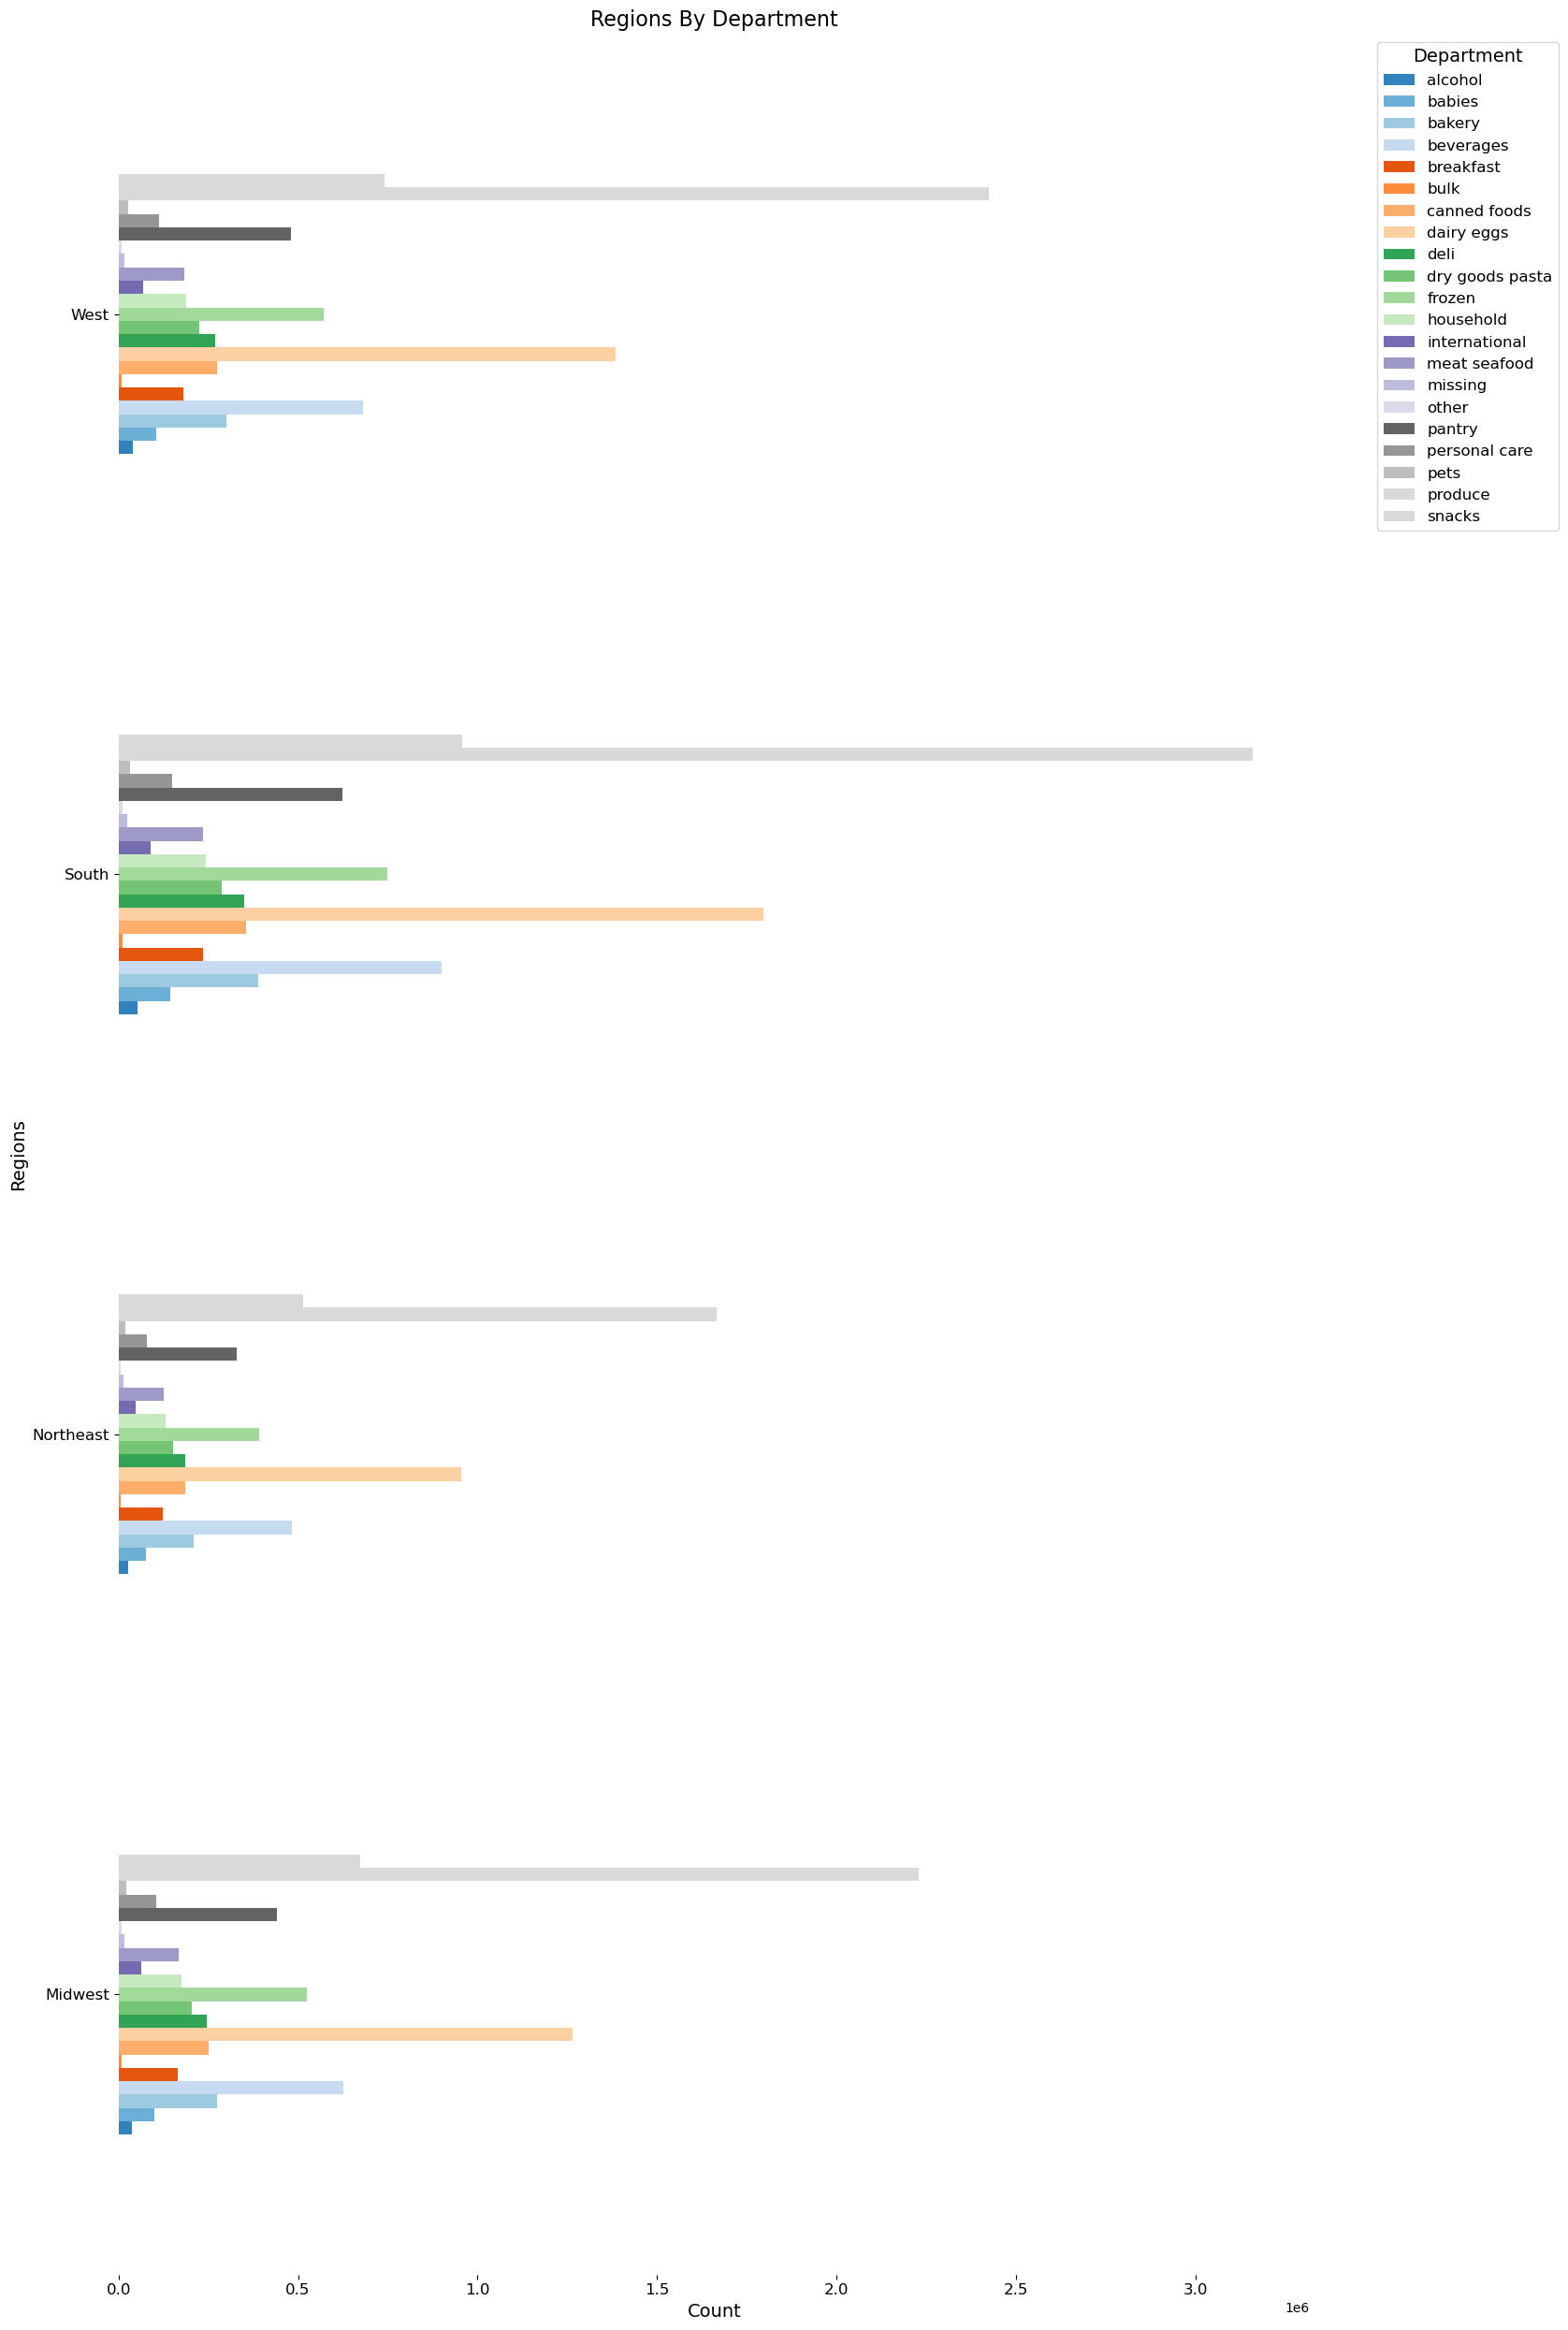

In [248]:
plt.figure(figsize=(20, 25))
region_department_comparison_bar = region_department_comparison.plot(kind='barh', figsize=(20, 25), colormap='tab20c', rot=0)

# Add title and labels with larger font size
plt.title('Regions By Department', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regions', fontsize=14)

# Increase font size for ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [250]:
region_department_comparison_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_department_comparison_bar.png'))

#### Profile Regions

In [187]:
# Region and age group
region_age_group_comparison=pd.crosstab(df['region'],df['age_group'],dropna=False)
region_age_group_comparison

age_group,Middle-aged,Senior,Young-adult
region,,,
Midwest,3607082,2569538,1420705
Northeast,2679196,1973103,1070437
South,5053669,3685583,2052633
West,3907216,2839031,1546666


<Figure size 1000x700 with 0 Axes>

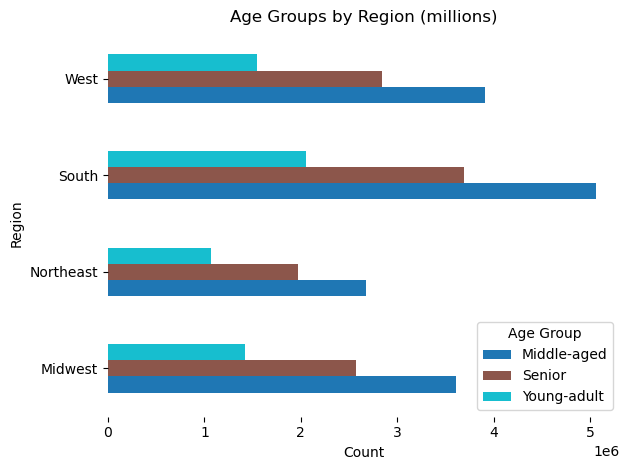

In [188]:
# Region Age Group Comparison Bar Chart
plt.figure(figsize =(10,7))

region_age_group_comparison_bar = region_age_group_comparison.plot(kind = 'barh', colormap = 'tab10')

plt.title('Age Groups by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')


plt.tight_layout()

plt.legend(title='Age Group')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [193]:
# Save region_age_group_comparison bar chart
region_age_group_comparison_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_age_group_comparison_bar.png'))

In [211]:
# Region and Income Group
region_income_group = pd.crosstab(df['region'], df['income_group'], dropna = False)
region_income_group

income_group,Lower class,Middle class,Upper class
region,,,
Midwest,1426435,5346960,823930
Northeast,1082018,4032780,607938
South,2086189,7546730,1158966
West,1566050,5823872,902991


<Figure size 1000x700 with 0 Axes>

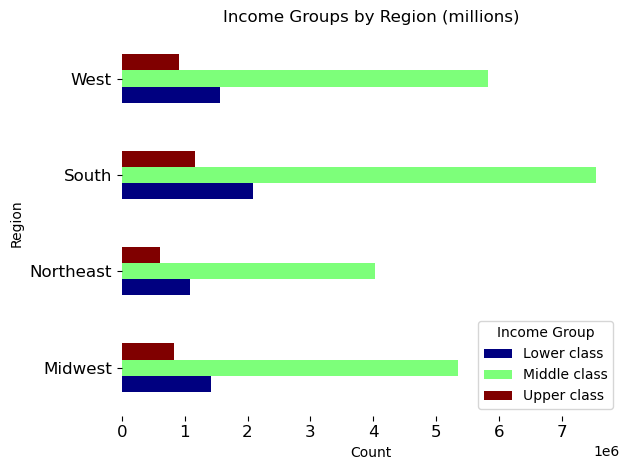

In [212]:
plt.figure(figsize =(10,7))

region_income_group_bar = region_income_group.plot(kind = 'barh',colormap = 'jet')

plt.title('Income Groups by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.legend(title='Income Group')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [215]:
region_income_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_income_group_bar.png'))

In [203]:
# Region and Dependent Status
region_dependent_status = pd.crosstab(df['region'], df['dependent_status'], dropna = False)
region_dependent_status

dependent_status,Family,Married,Single
region,,,
Midwest,3765653,1926472,1905200
Northeast,2862182,1442253,1418301
South,5430496,2659730,2701659
West,4167921,2052649,2072343


<Figure size 1000x700 with 0 Axes>

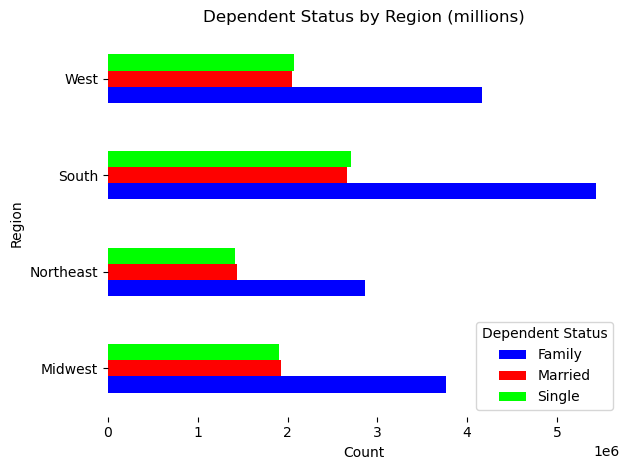

In [204]:
plt.figure(figsize =(10,7))

region_dependent_status_bar = region_dependent_status.plot(kind = 'barh', colormap = 'brg')

plt.title('Dependent Status by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')

plt.xticks()
plt.yticks()

plt.tight_layout()

plt.legend(title='Dependent Status')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [207]:
# Save figure
region_dependent_status_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_dependent_status_bar.png'))

In [177]:
# Region and Day of Week Name
region_day_of_week = pd.crosstab(df['region'], df['day_of_week_name'], dropna = False)
region_day_of_week

day_of_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
region,,,,,,,
Midwest,1058124,991770,1460186,1320759,983262,895093,888131
Northeast,787283,746153,1097258,999953,746455,679308,666326
South,1496781,1404662,2052776,1892057,1399737,1287335,1258537
West,1154302,1071245,1593962,1447461,1076337,978798,970808


<Figure size 1000x700 with 0 Axes>

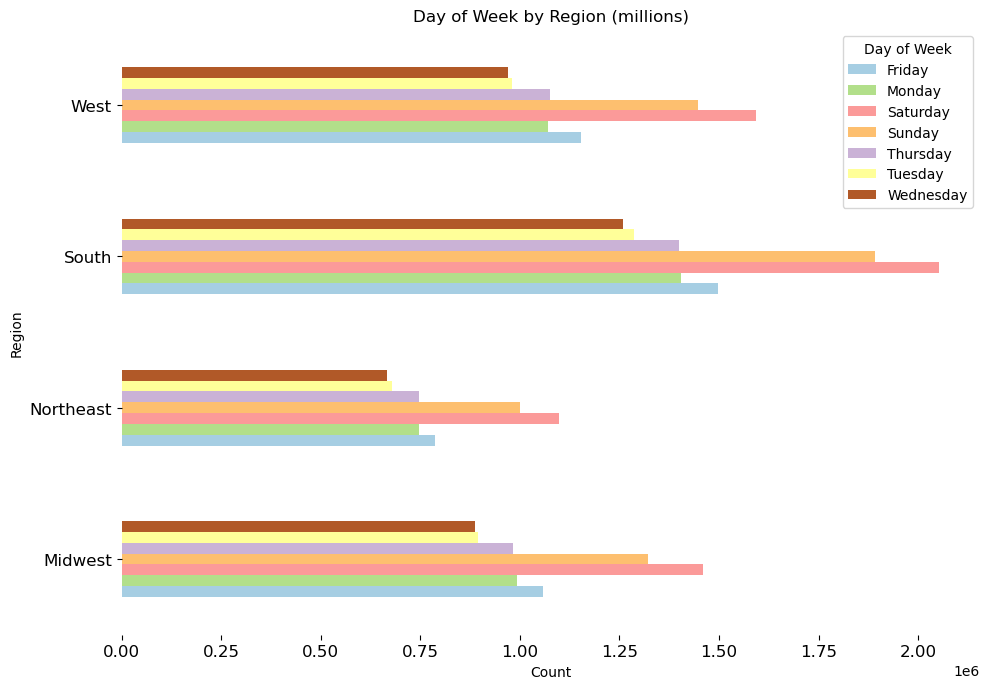

In [178]:
plt.figure(figsize =(10,7))

region_day_of_week_bar = region_day_of_week.plot(kind = 'barh', figsize = (10,7), colormap = 'Paired')

plt.title('Day of Week by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.legend(title='Day of Week')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [181]:
region_day_of_week_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_day_of_week_bar.png'))

In [171]:
# Region and Week Category
region_week_category = pd.crosstab(df['region'], df['week_category'], dropna = False)
region_week_category

week_category,Weekday,Weekend
region,,
Midwest,4816380,2780945
Northeast,3625525,2097211
South,6847052,3944833
West,5251490,3041423


<Figure size 1000x700 with 0 Axes>

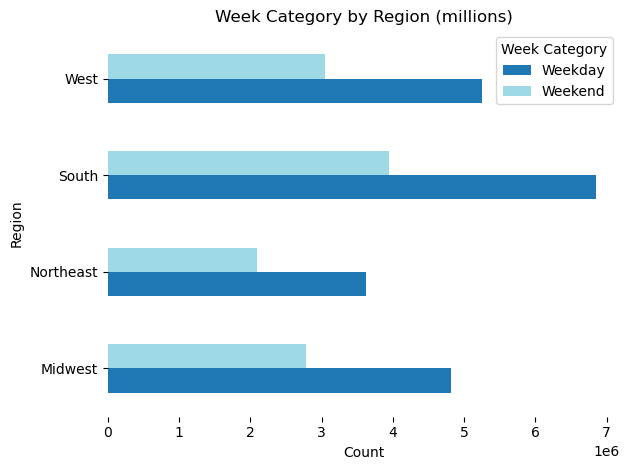

In [173]:
plt.figure(figsize =(10,7))

region_week_category_bar = region_week_category.plot(kind = 'barh', colormap = 'tab20')

plt.title('Week Category by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')


plt.tight_layout()

plt.legend(title='Week Category')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [183]:
region_week_category_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_week_category_bar.png'))

In [195]:
# Region and Hour of Day Group
region_hour_of_day_group = pd.crosstab(df['region'], df['hour_of_day_group'], dropna = False)
region_hour_of_day_group

hour_of_day_group,Afternoon,Evening,Morning
region,,,
Midwest,3573015,1349760,2674550
Northeast,2696464,1006949,2019323
South,5059553,1901898,3830434
West,3924590,1444534,2923789


<Figure size 1000x700 with 0 Axes>

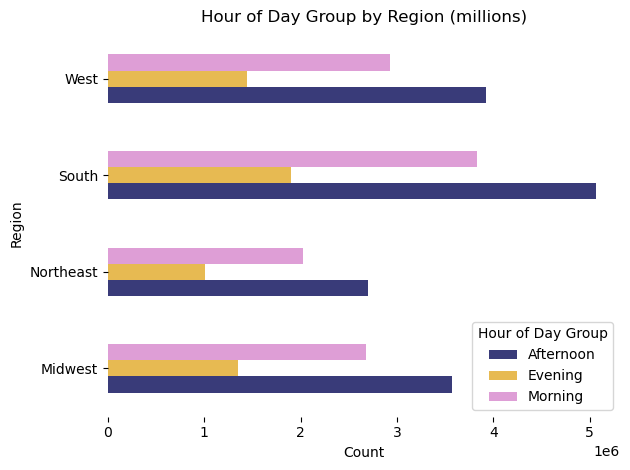

In [196]:
plt.figure(figsize= (10,7))
region_hour_of_day_group_bar = region_hour_of_day_group.plot(kind = 'barh', colormap = 'tab20b')

plt.title('Hour of Day Group by Region (millions)')
plt.xlabel('Count')
plt.ylabel('Region')


plt.tight_layout()

plt.legend(title='Hour of Day Group')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [199]:
region_hour_of_day_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'region_hour_of_day_group_bar.png'))

#### Profile Departments

In [291]:
# Department and Age Group
department_age_group = pd.crosstab(df['age_group'], df['department'], dropna = False)
department_age_group

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged,73261,200426,552051,1264872,329842,16164,501378,2542664,494313,406998,...,346711,126896,331668,32399,16877,881722,211982,45208,4463794,1360316
Senior,50664,142912,400020,923708,238897,11803,363738,1838082,359502,295202,...,254139,91030,244361,23319,12251,641837,151869,33393,3240599,982320
Young-adult,29771,80464,220357,499543,134294,6606,202942,1018001,197434,164427,...,137816,51327,132898,13427,7163,351810,83721,19115,1774898,544914


<Figure size 1800x800 with 0 Axes>

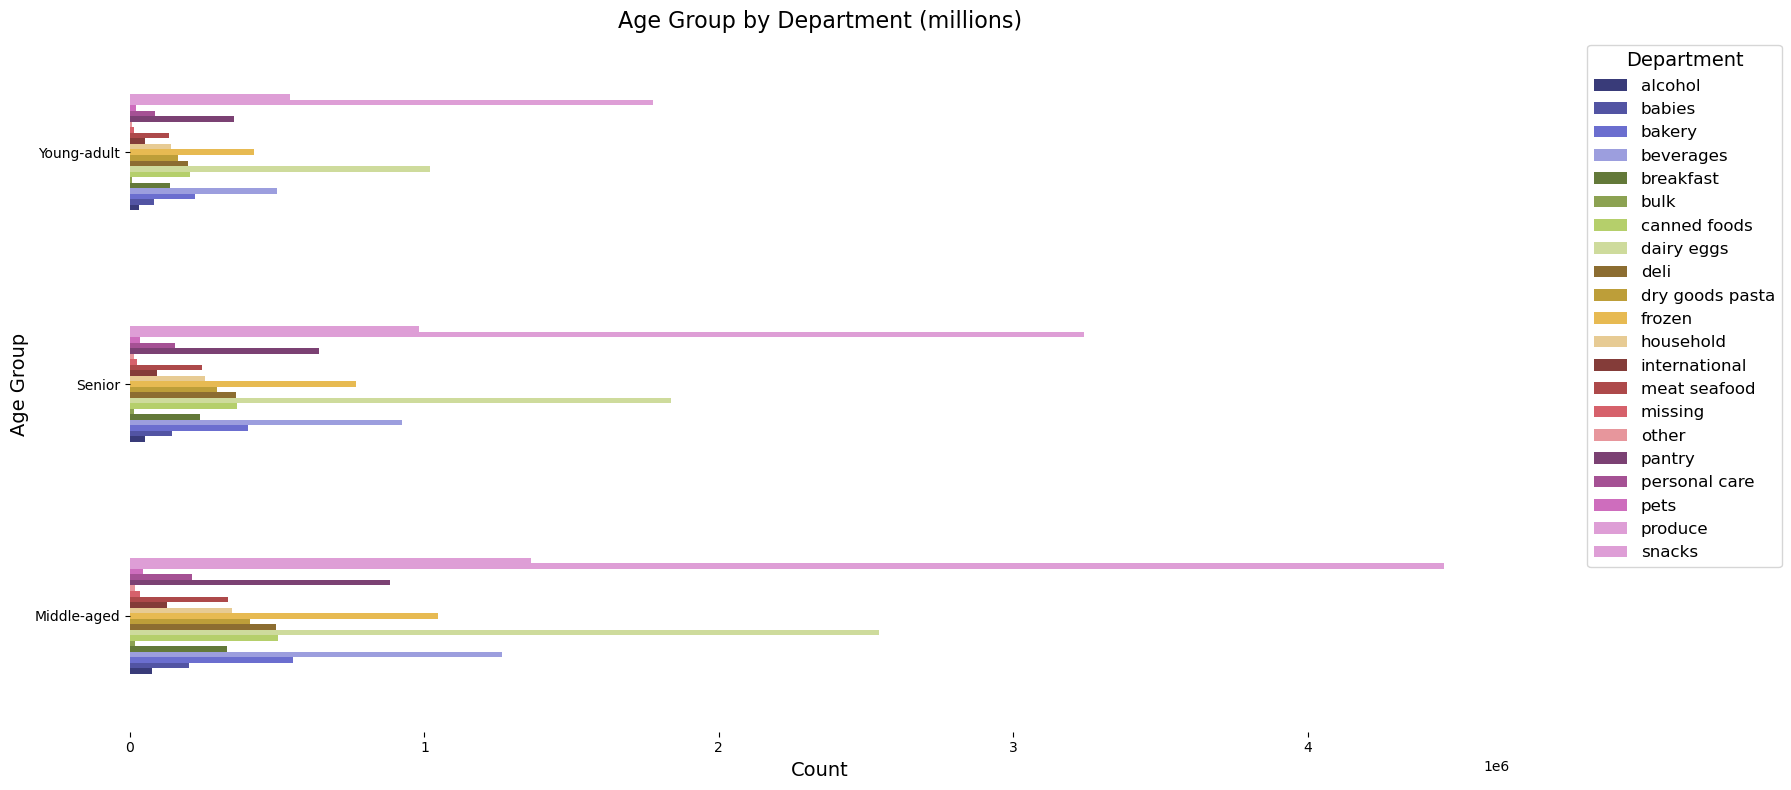

In [343]:
plt.figure(figsize =(18,8))

department_age_group_bar = department_age_group.plot(kind = 'barh',figsize = (18,8), colormap = 'tab20b')

plt.title('Age Group by Department (millions)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age Group', fontsize=14)

plt.tight_layout(rect=[0, 0, 0.85, 1])


plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [345]:
department_age_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_age_group_bar.png'))

In [361]:
# Department and Income Group
department_income_group = pd.crosstab(df['income_group'], df['department'], dropna = False)
department_income_group

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
Lower class,31206,59932,204635,627805,155965,7602,168540,954506,197021,136492,...,152491,44336,87331,12853,7021,325084,87537,16497,1623058,853532
Middle class,100536,316769,833930,1777668,472734,23901,779201,3853421,740989,633906,...,502043,195253,539043,48757,25111,1341084,311480,69655,6845437,1760758
Upper class,21954,47101,133863,282650,74334,3070,120317,590820,113239,96229,...,84132,29664,82553,7535,4159,209201,48555,11564,1010796,273260


<Figure size 1800x800 with 0 Axes>

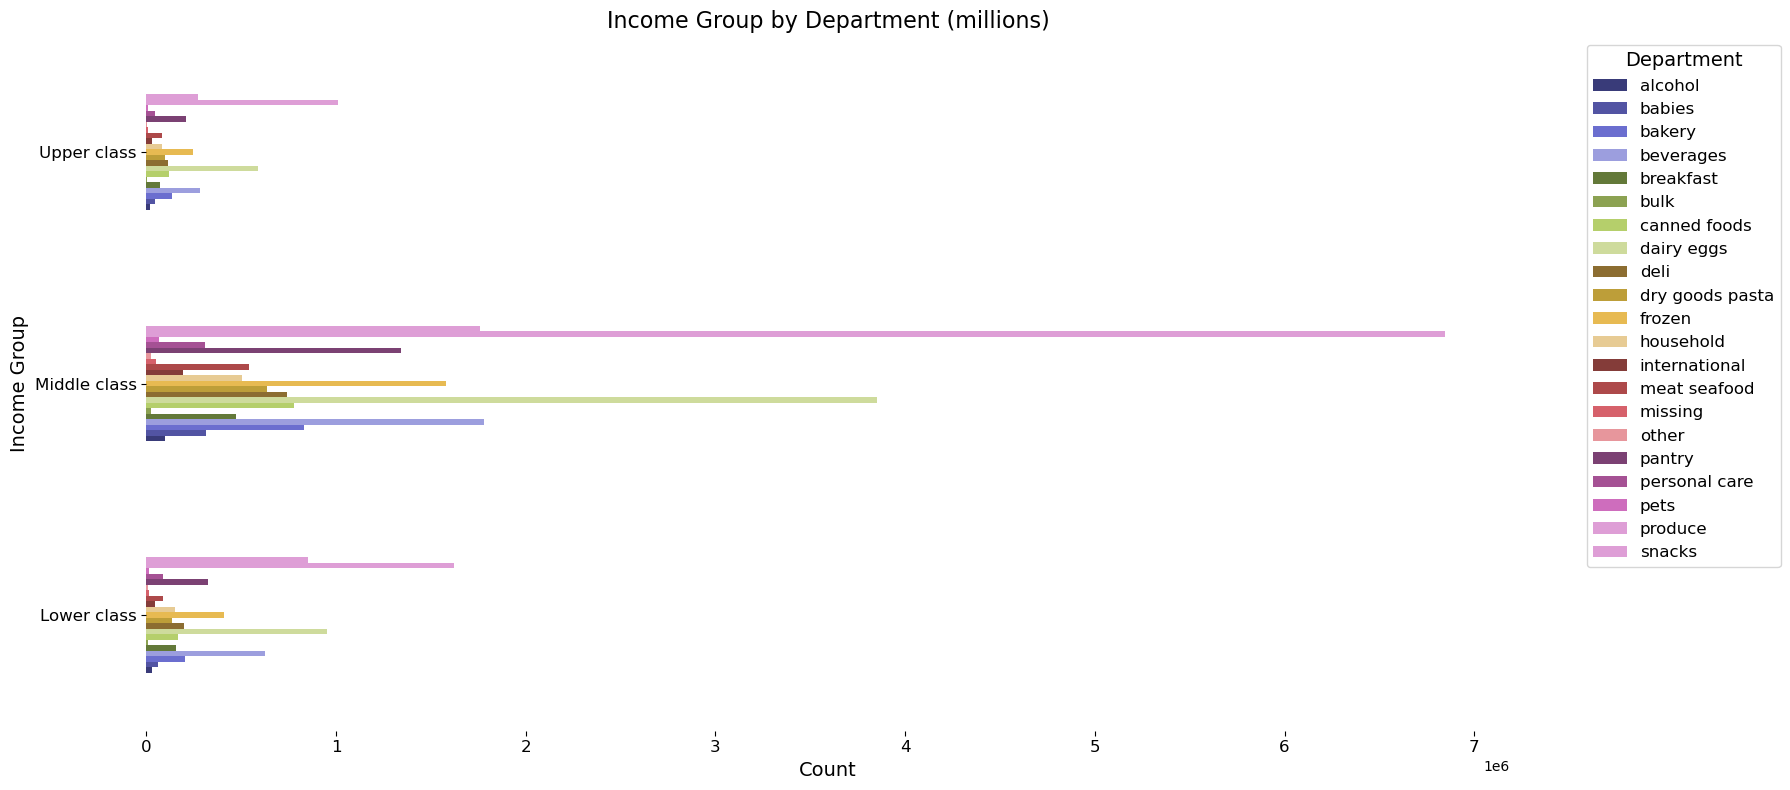

In [362]:
plt.figure(figsize =(18,8))

department_income_group_bar = department_income_group.plot(kind = 'barh', figsize = (18,8), colormap = 'tab20b')

plt.title('Income Group by Department (millions)', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Income Group', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [365]:
department_income_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_income_group_bar.png'))

In [335]:
# Department and Dependent Status
department_dependent_status = pd.crosstab(df['dependent_status'], df['department'], dropna = False)
department_dependent_status

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
dependent_status,,,,,,,,,,,,,,,,,,,,,
Family,76614,214069,585030,1345455,351247,17447,536091,2695896,526537,435305,...,372549,133532,357020,34925,17930,939262,223844,48098,4744660,1447814
Married,37964,103239,292993,668226,177209,8848,267129,1353489,259567,216060,...,185344,68008,177823,17132,9186,469350,111722,25035,2359186,718938
Single,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798


<Figure size 2000x2500 with 0 Axes>

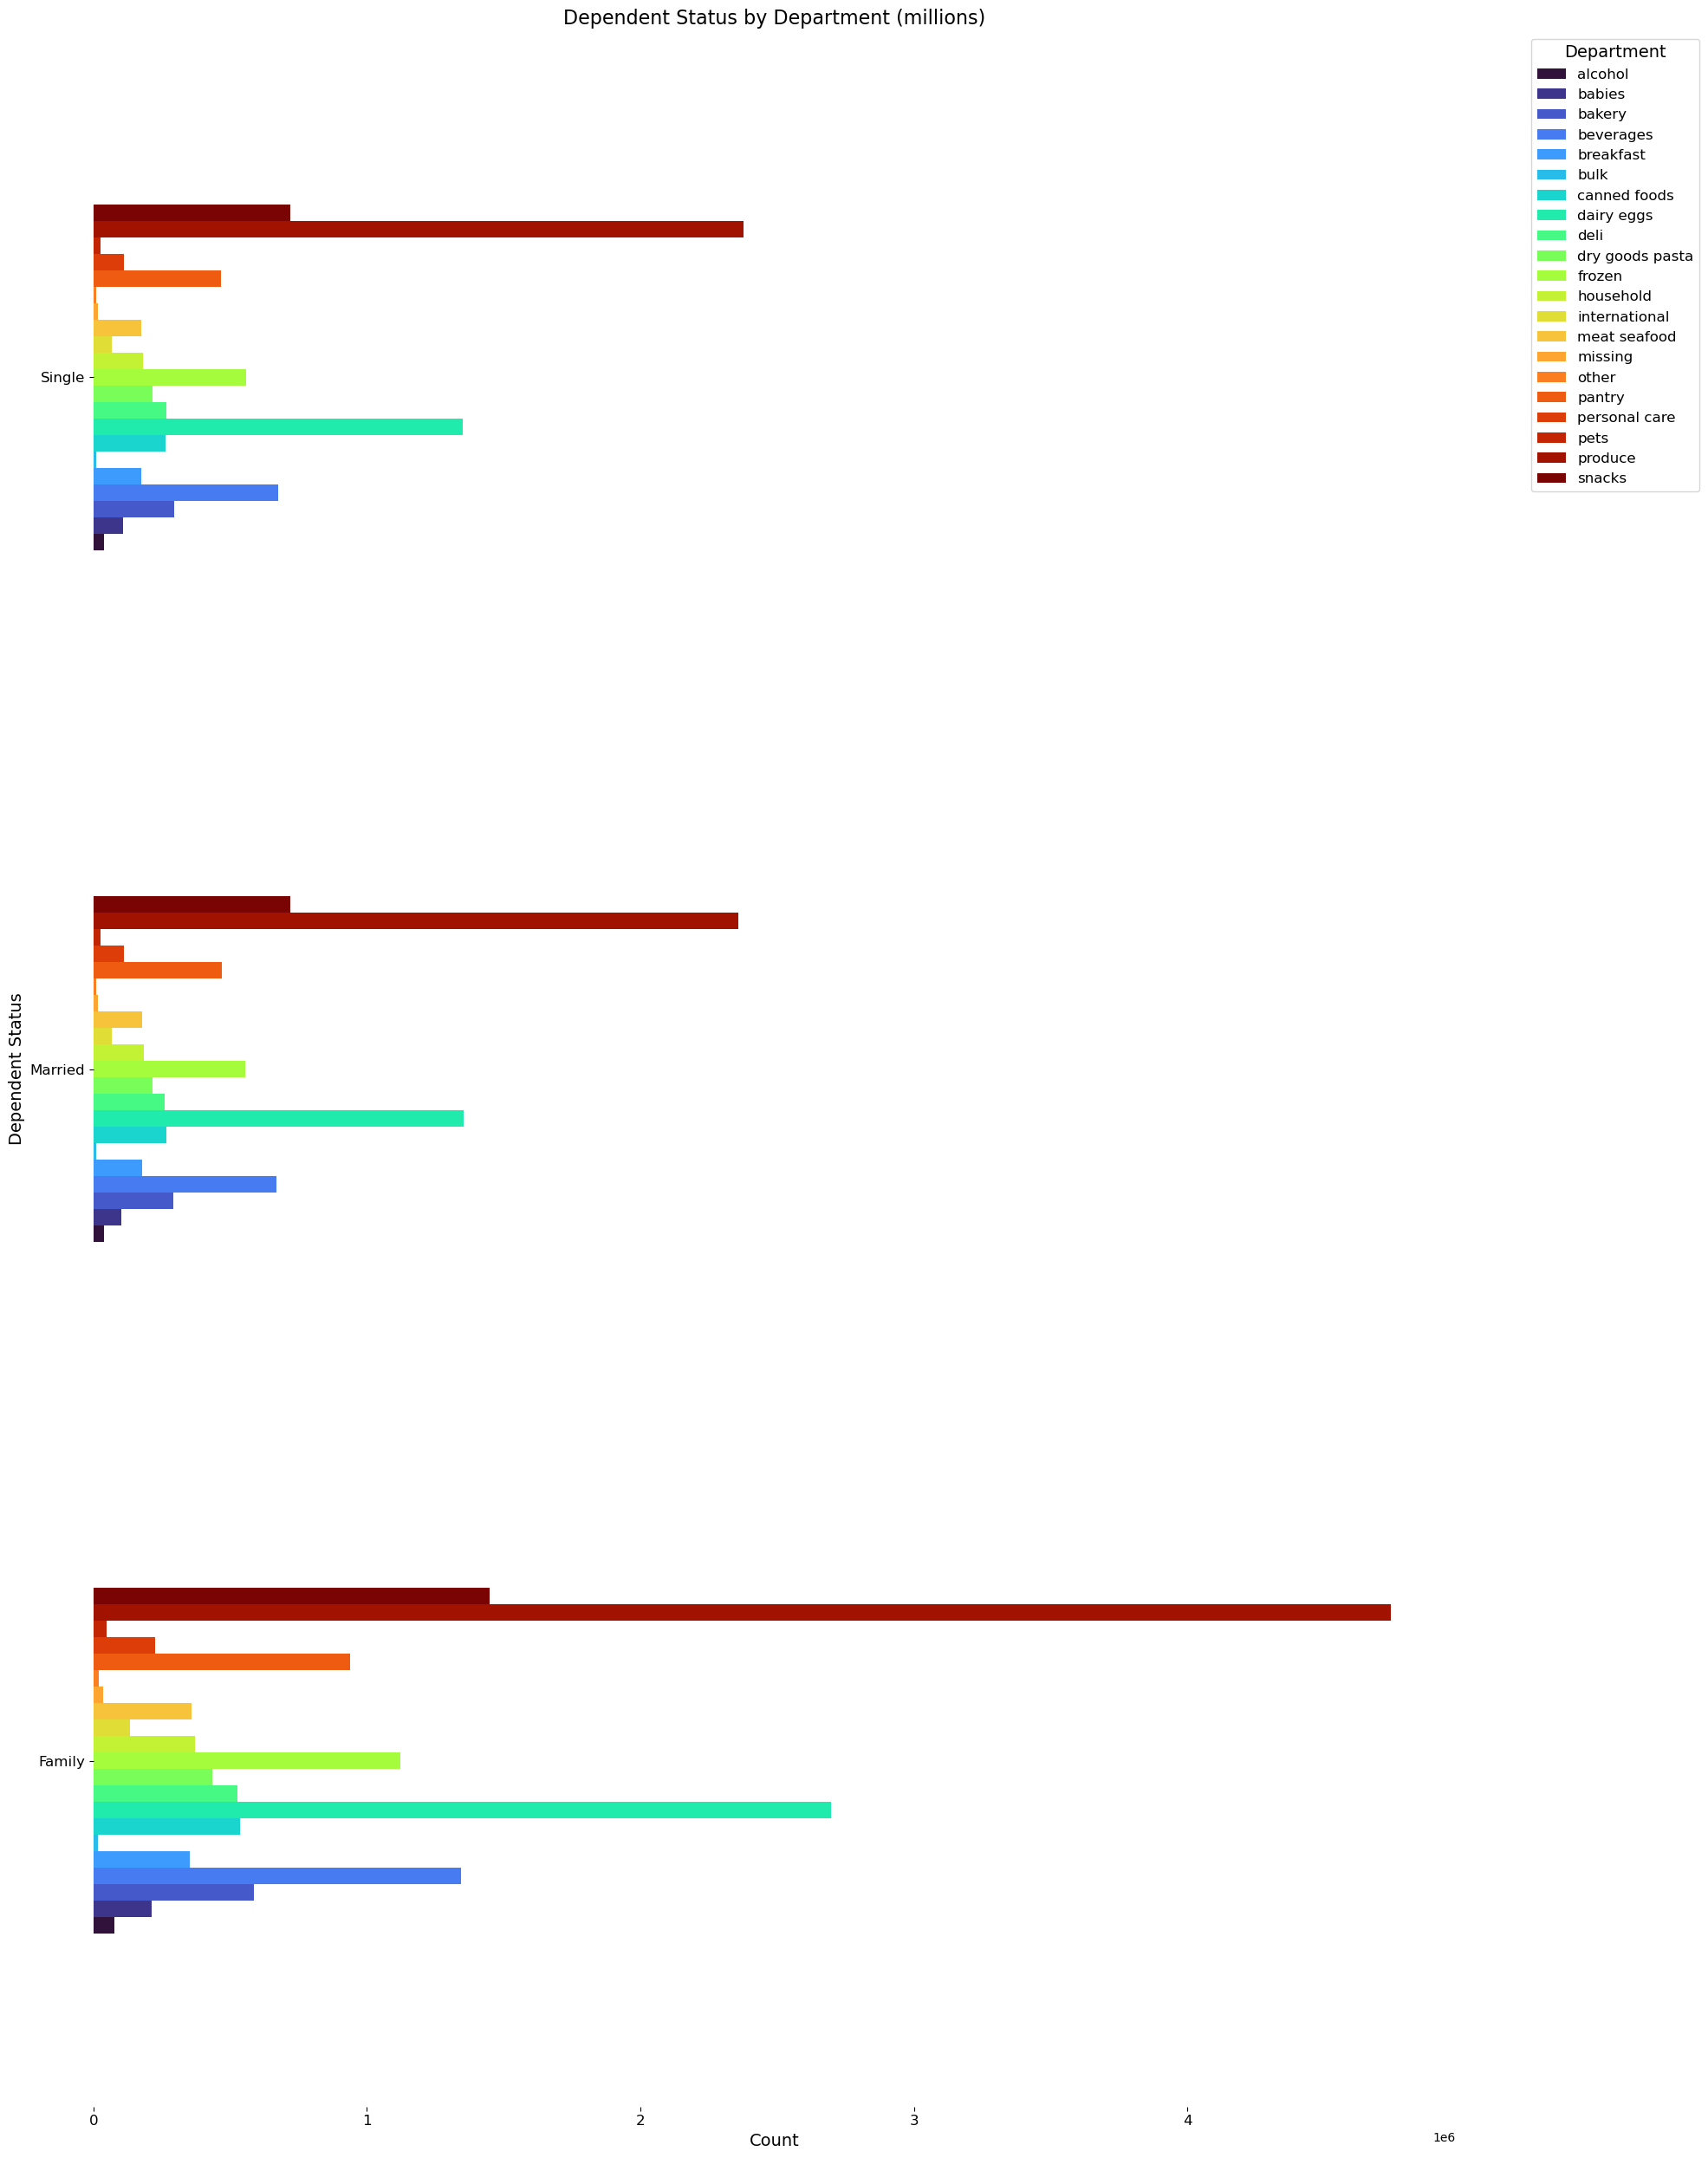

In [341]:
plt.figure(figsize =(20,25))

department_dependent_status_bar = department_dependent_status.plot(kind = 'barh', figsize = (20,25), colormap = 'turbo')

plt.title('Dependent Status by Department (millions)', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Dependent Status', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [347]:
department_dependent_status_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_dependent_status_bar.png'))

In [355]:
# Department and Day of Week Name
department_day_of_week = pd.crosstab(df['day_of_week_name'], df['department'], dropna = False)
department_day_of_week

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
day_of_week_name,,,,,,,,,,,,,,,,,,,,,
Friday,19304,56829,162882,341370,89390,4723,163607,735640,145169,127263,...,102601,38728,108822,10072,5040,276247,64321,15412,1338596,353801
Monday,20325,56698,152094,371272,94968,4559,132596,706961,135582,111066,...,100229,34429,86829,8574,4969,240818,59991,11923,1198541,399307
Saturday,17437,81622,224913,432722,125907,6137,228161,1017027,209526,182149,...,126237,55728,151415,13220,6086,351912,80500,17149,1953784,483709
Sunday,20600,73057,203312,482348,128136,6339,179995,954759,184736,147855,...,121267,46394,119042,11378,5978,305028,72300,14526,1685056,537636
Thursday,27429,51573,153178,375912,93525,4580,129185,710436,134434,103684,...,99366,32836,87963,9415,5053,248690,57946,13704,1181596,394519
Tuesday,22459,52455,138844,344572,86383,4246,119361,639699,122133,98761,...,95575,31540,77949,8312,4602,227573,57336,12586,1069260,360898
Wednesday,26142,51568,137205,339927,84724,3989,115153,634225,119669,95849,...,93391,29598,76907,8174,4563,225101,55178,12416,1052458,357680


<Figure size 2000x2500 with 0 Axes>

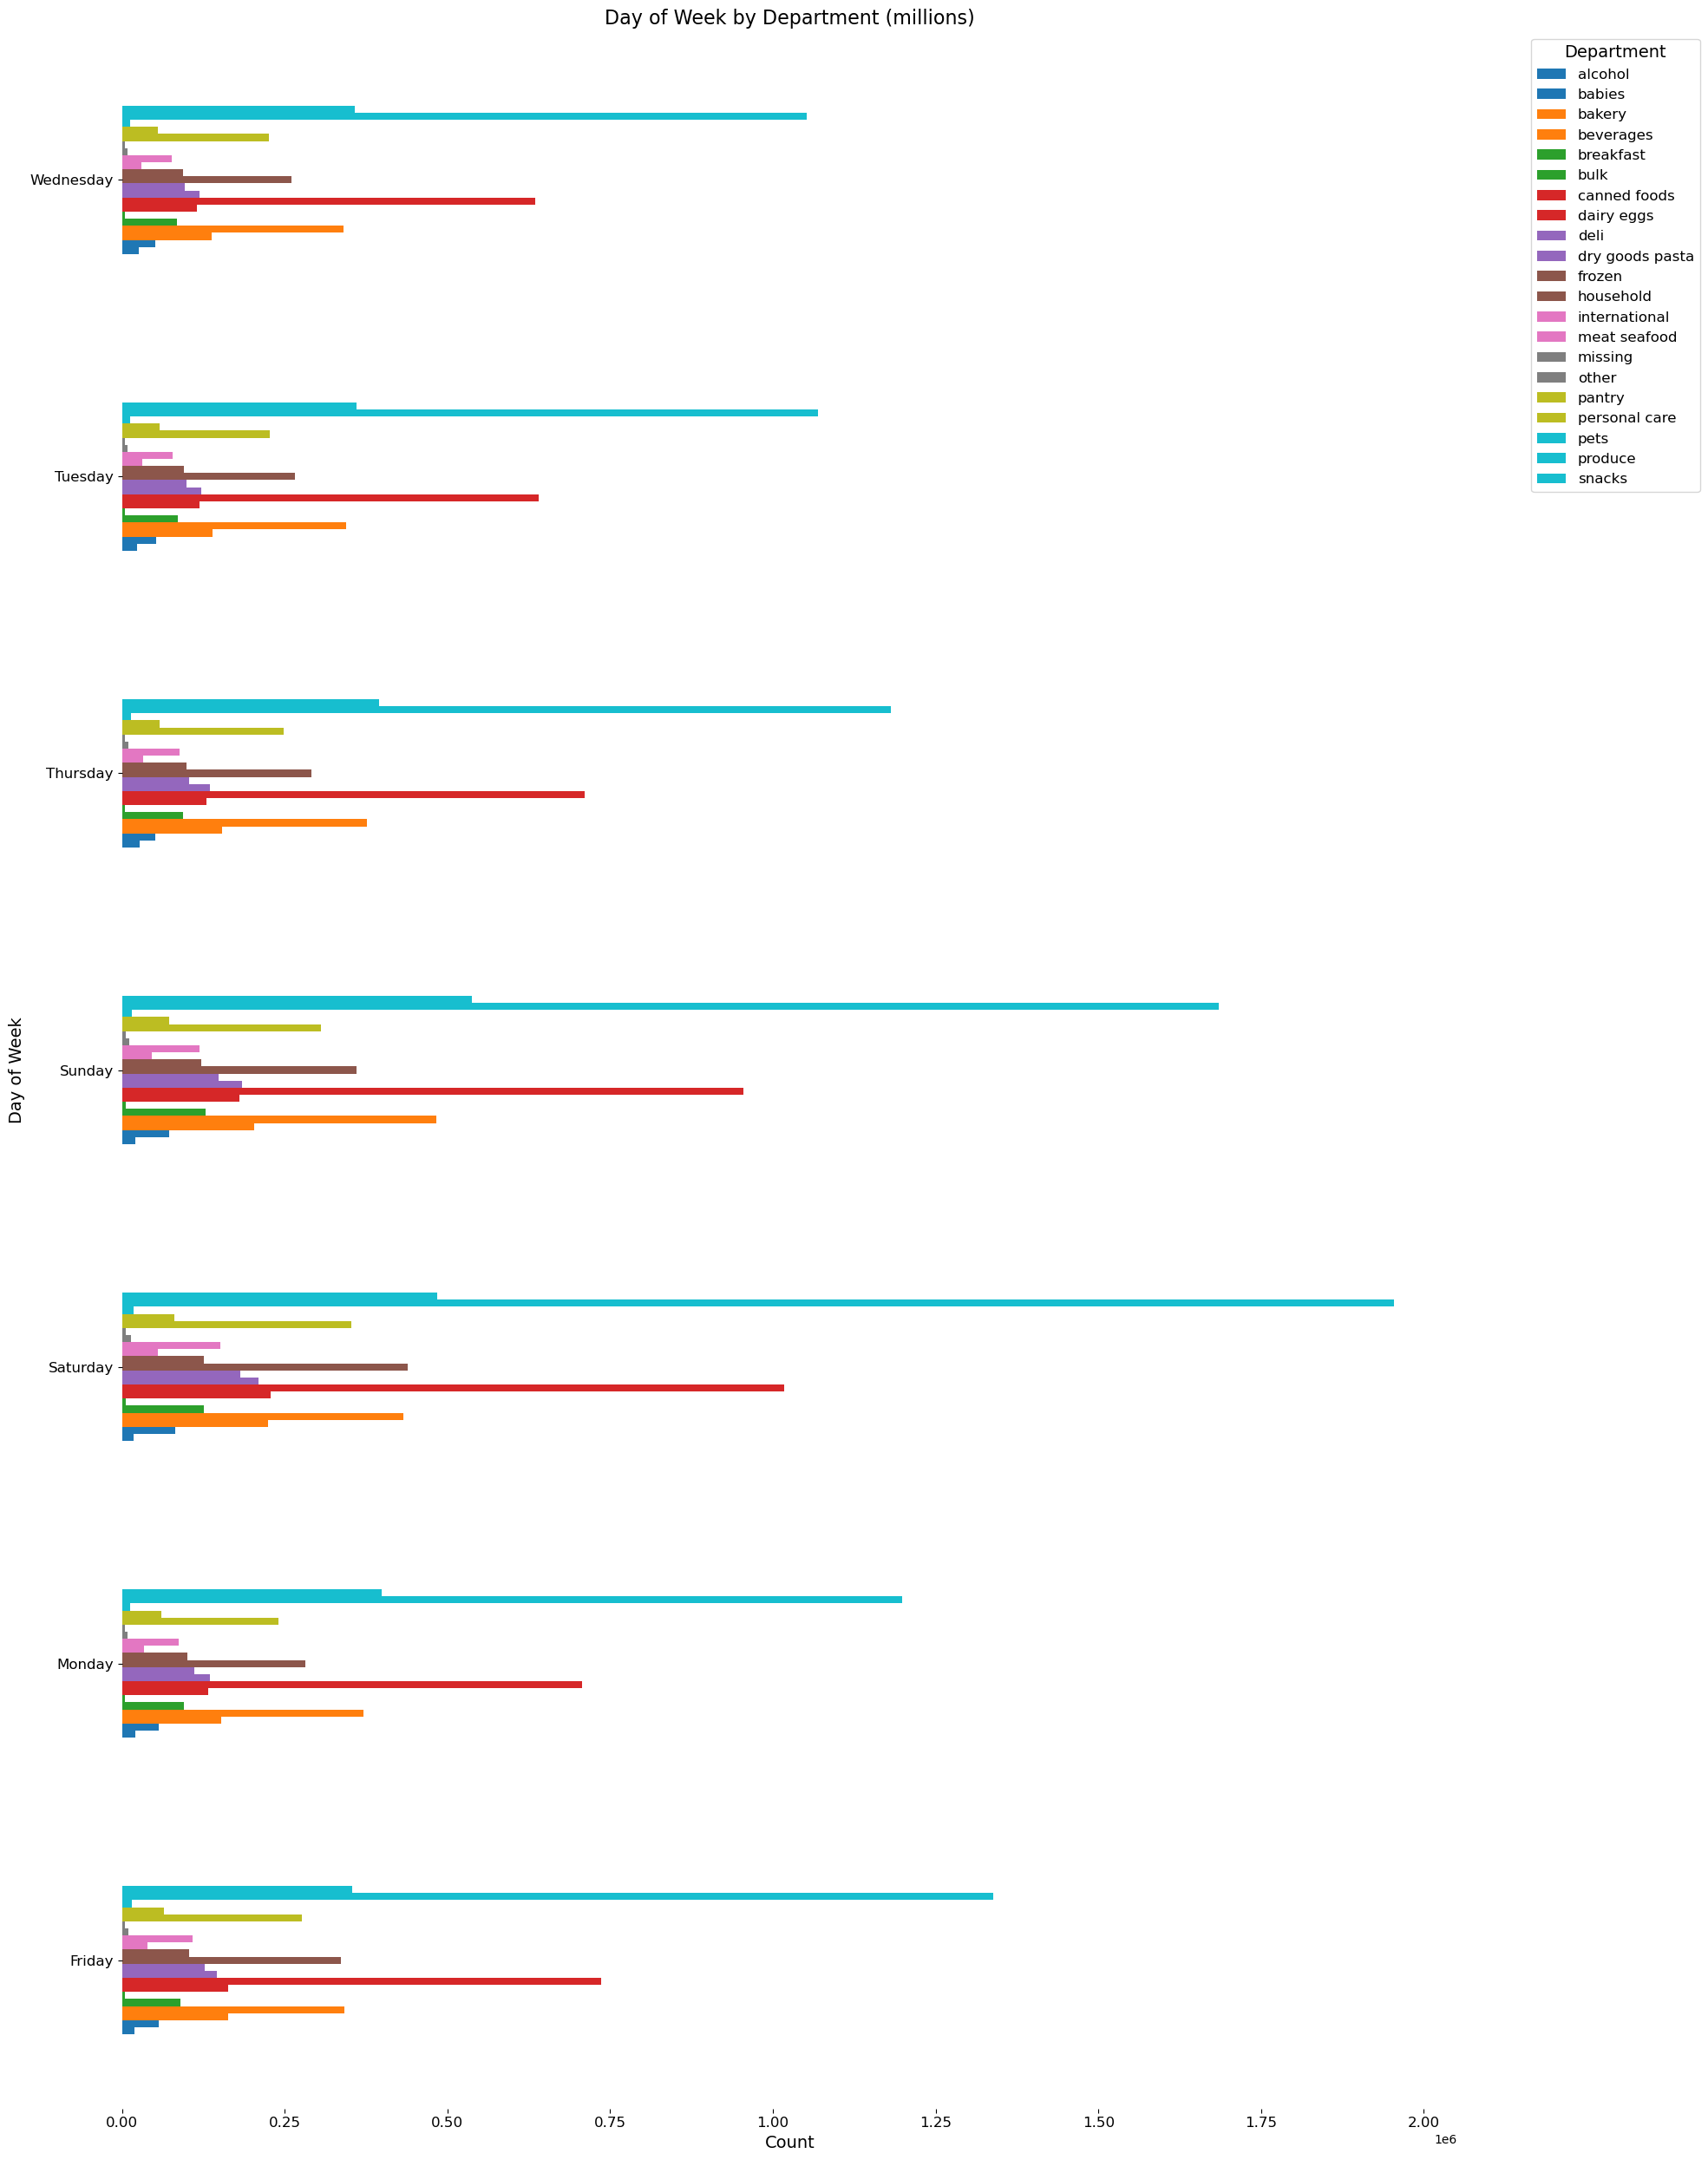

In [361]:
plt.figure(figsize =(20,25))

department_day_of_week_bar = department_day_of_week.plot(kind = 'barh', figsize = (20,25), colormap = 'tab10')

plt.title('Day of Week by Department (millions)', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Day of Week', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [363]:
department_day_of_week_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_day_of_week_bar.png'))

In [367]:
# Department and Week Category
department_week_category = pd.crosstab(df['week_category'], df['department'], dropna = False)
department_week_category

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
week_category,,,,,,,,,,,,,,,,,,,,,
Weekday,115659,269123,744203,1773053,448990,22097,659902,3426961,656987,536623,...,491162,167131,438470,44547,24227,1218429,294772,66041,5840451,1866205
Weekend,38037,154679,428225,915070,254043,12476,408156,1971786,394262,330004,...,247504,102122,270457,24598,12064,656940,152800,31675,3638840,1021345


<Figure size 2000x2500 with 0 Axes>

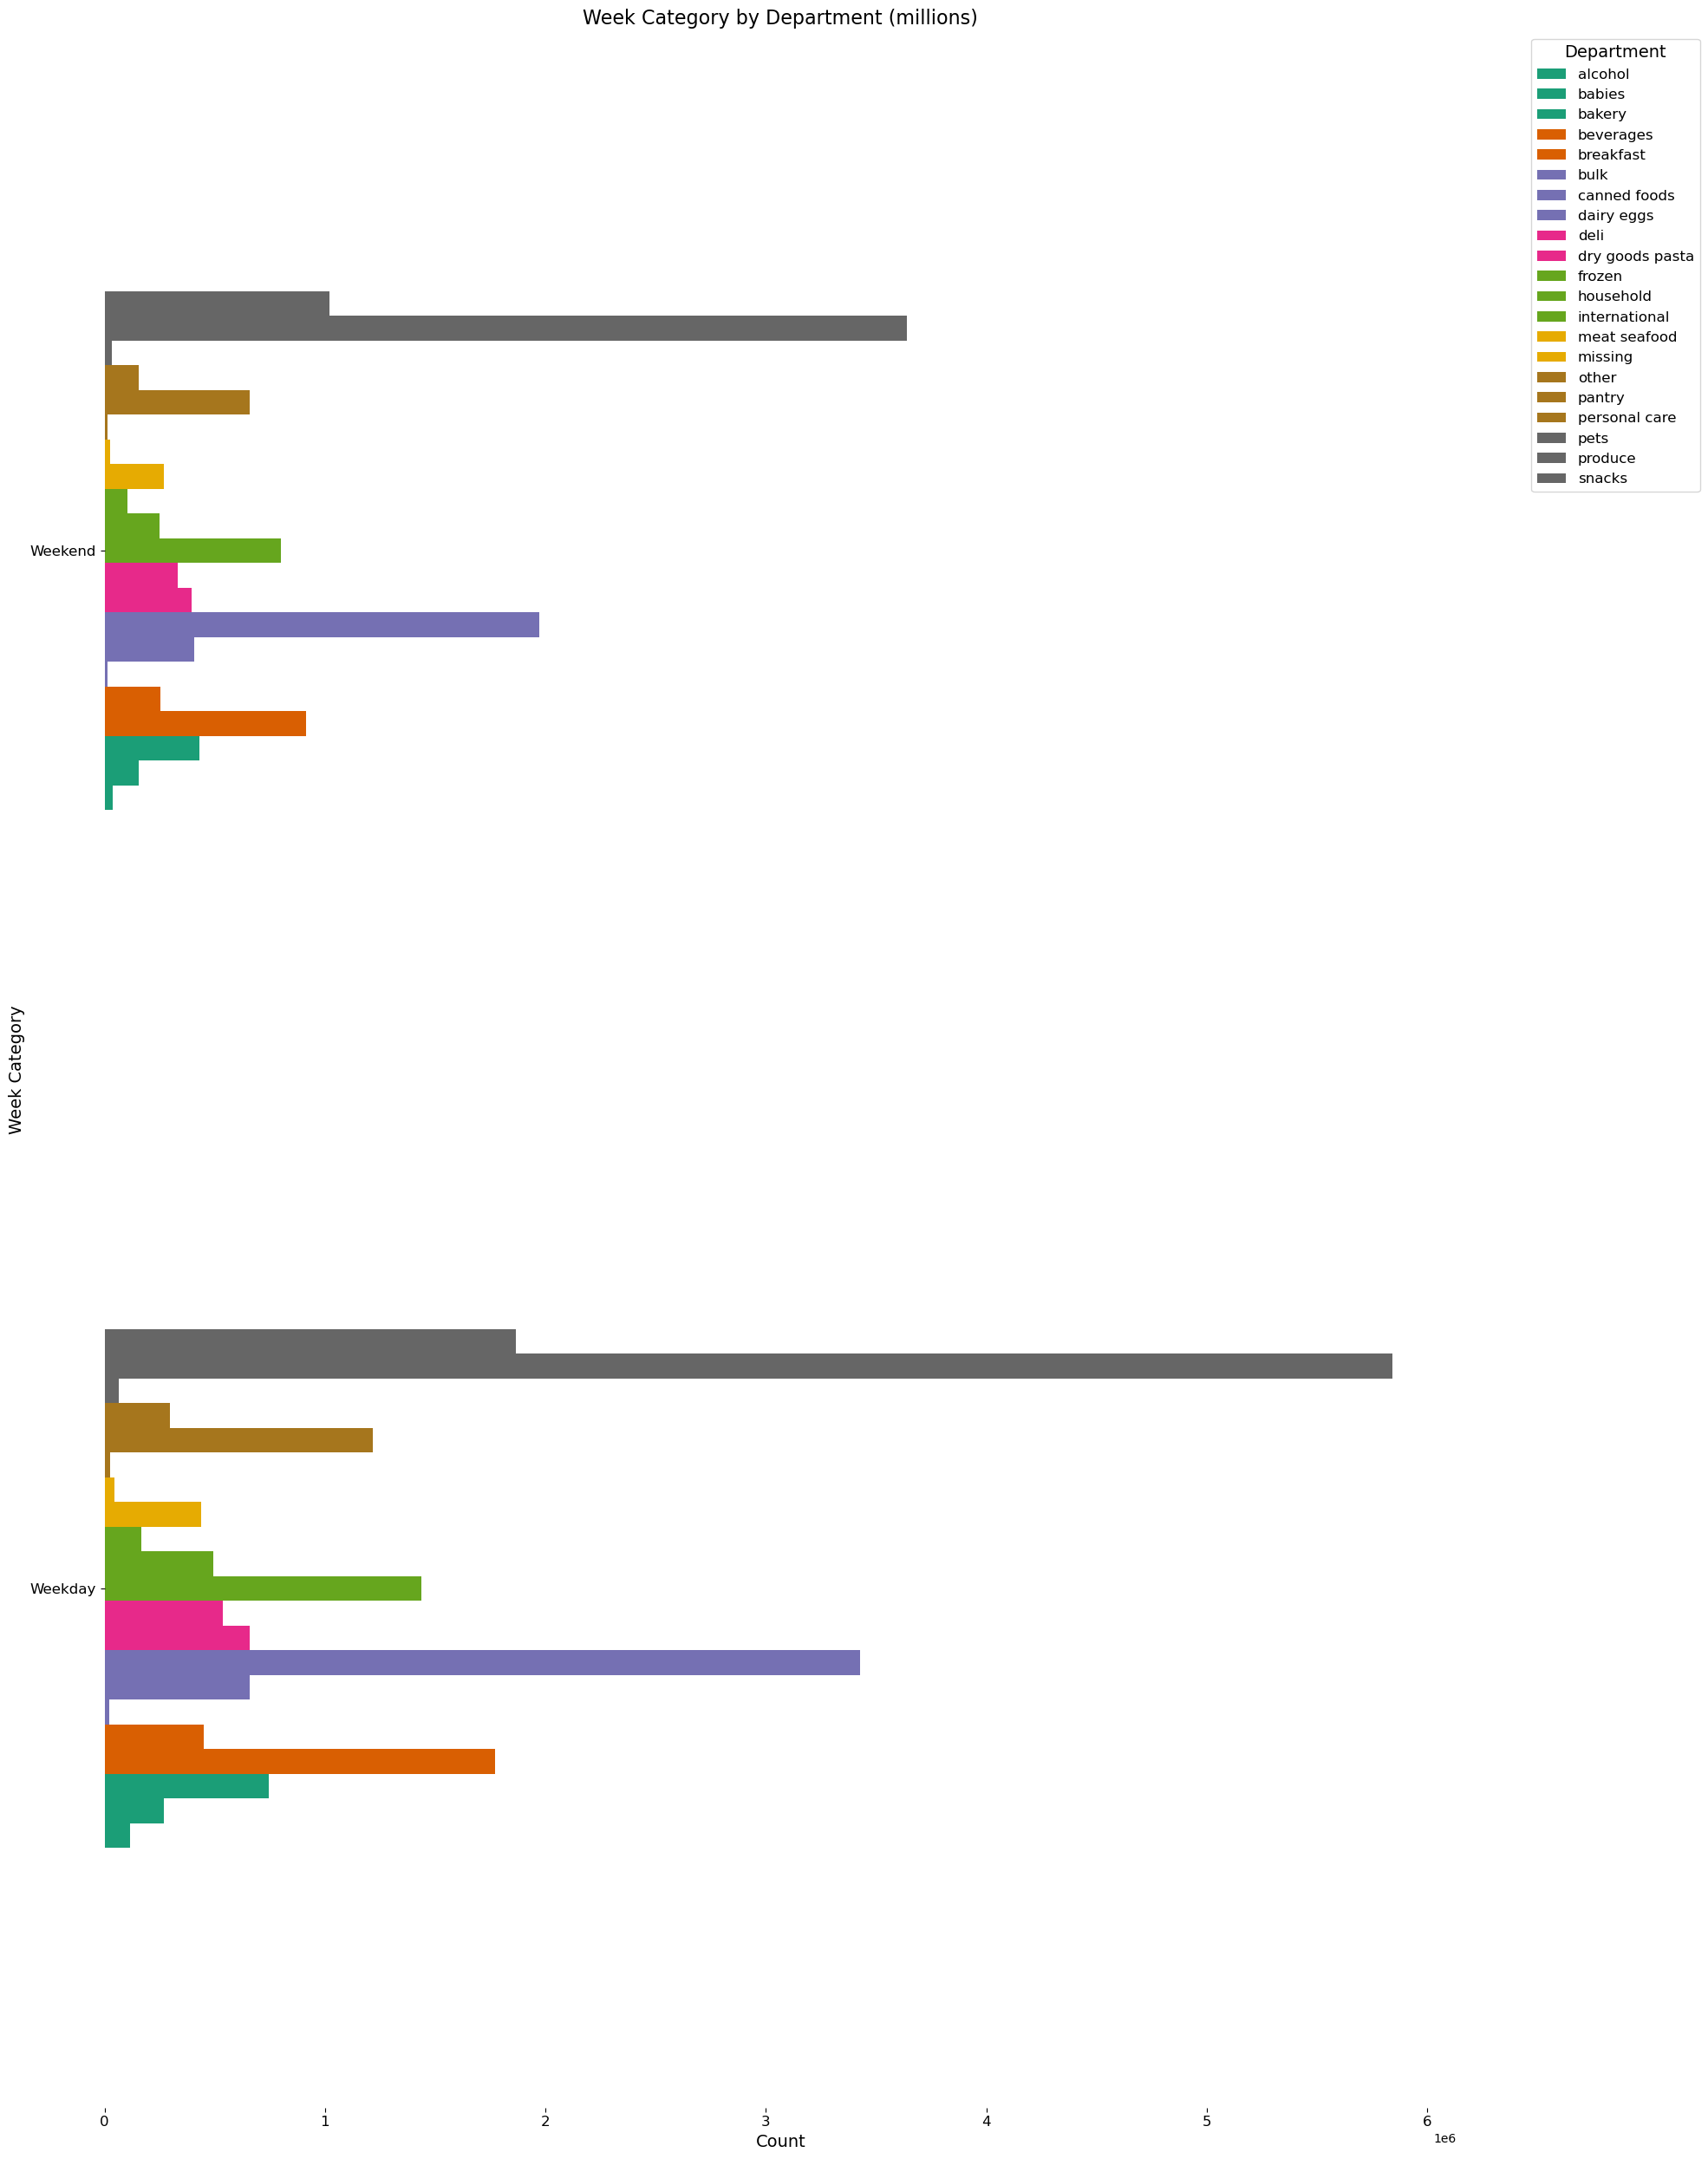

In [369]:
plt.figure(figsize =(20,25))

department_week_category_bar = department_week_category.plot(kind = 'barh', figsize = (20,25), colormap = 'Dark2')

plt.title('Week Category by Department (millions)', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Week Category', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [371]:
department_week_category_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_week_category_bar.png'))

In [377]:
# Department and Hour of Day
department_hour_of_day_group = pd.crosstab(df['hour_of_day_group'], df['department'], dropna = False)
department_hour_of_day_group

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned foods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
hour_of_day_group,,,,,,,,,,,,,,,,,,,,,
Afternoon,84005,184757,558182,1258701,318301,15860,516853,2493352,504289,421452,...,340957,131702,342903,32295,17354,894780,208229,47296,4440211,1359289
Evening,22310,81549,200510,448688,123750,6314,183689,944513,184513,155176,...,130710,46925,123183,12647,6553,331252,84328,18395,1681969,483681
Morning,47381,157496,413736,980734,260982,12399,367516,1960882,362447,289999,...,266999,90626,242841,24203,12384,649337,155015,32025,3357111,1044580


<Figure size 2000x2500 with 0 Axes>

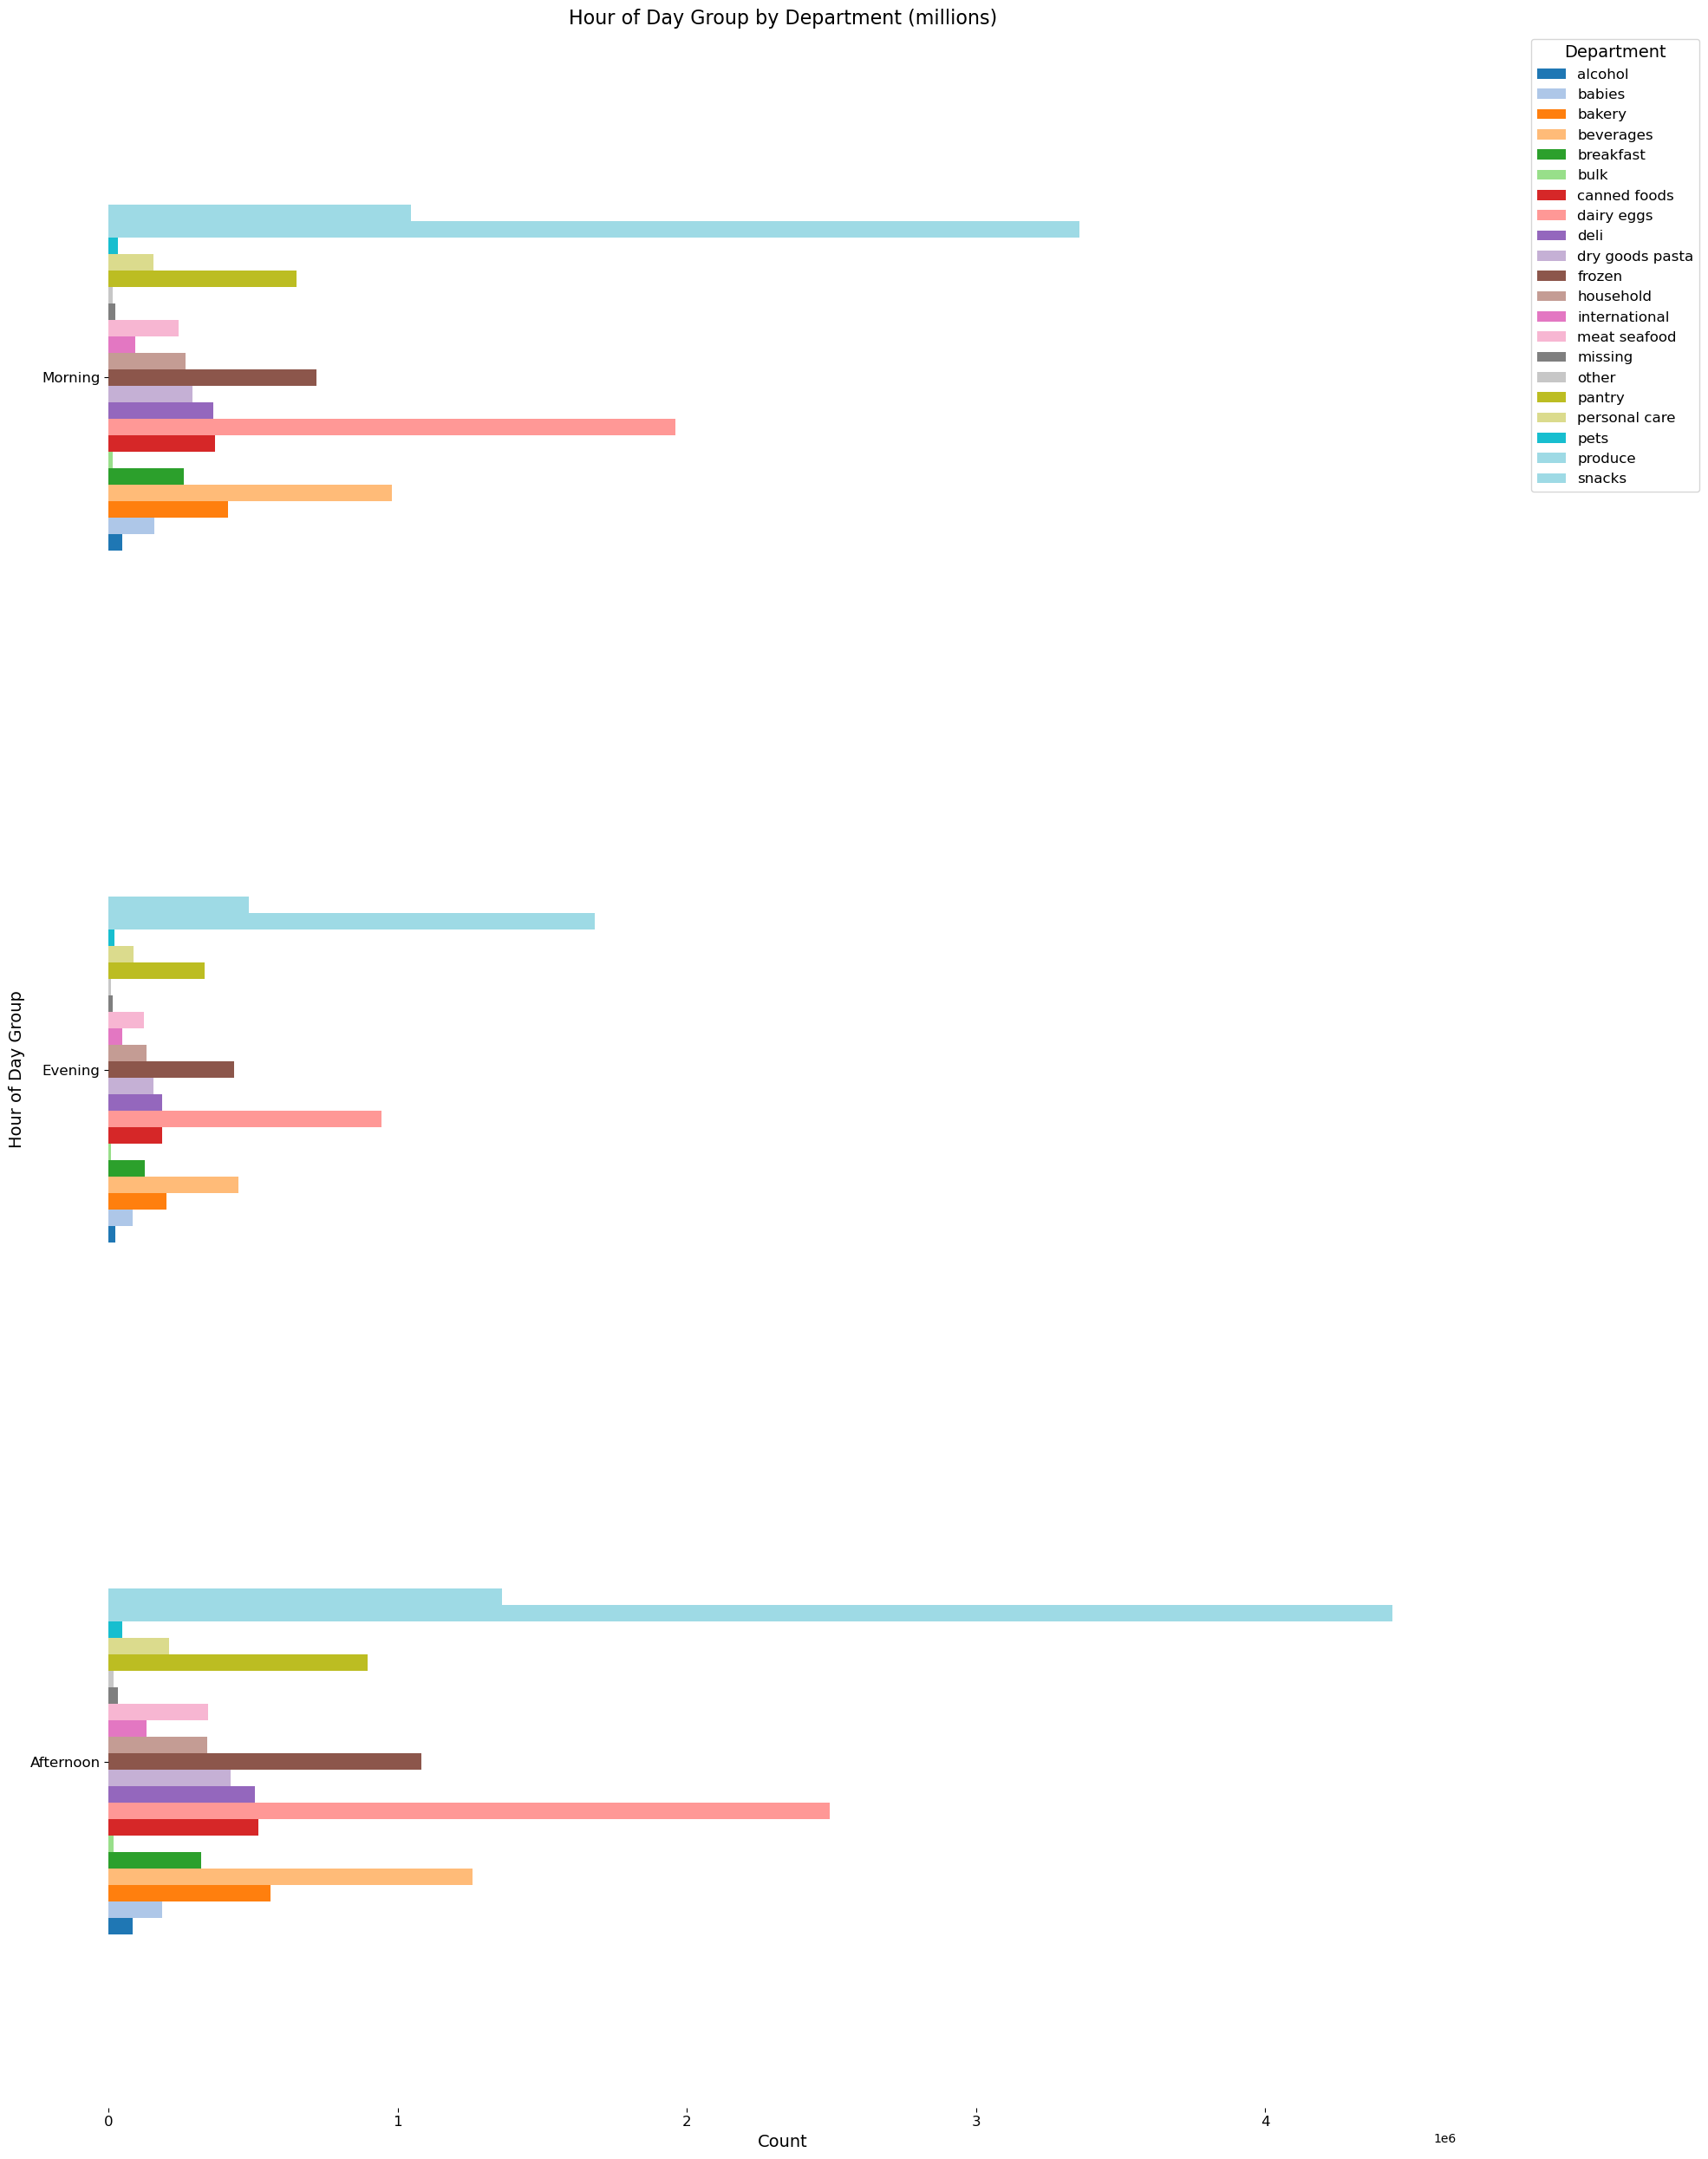

In [379]:
plt.figure(figsize =(20,25))

department_hour_of_day_group_bar = department_hour_of_day_group.plot(kind = 'barh', figsize = (20,25), colormap = 'tab20')

plt.title('Hour of Day Group by Department (millions)', fontsize = 16)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Hour of Day Group', fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12, title_fontsize = 14)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [382]:
department_hour_of_day_group_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_hour_of_day_group_bar.png'))

### 9. Additional Charts

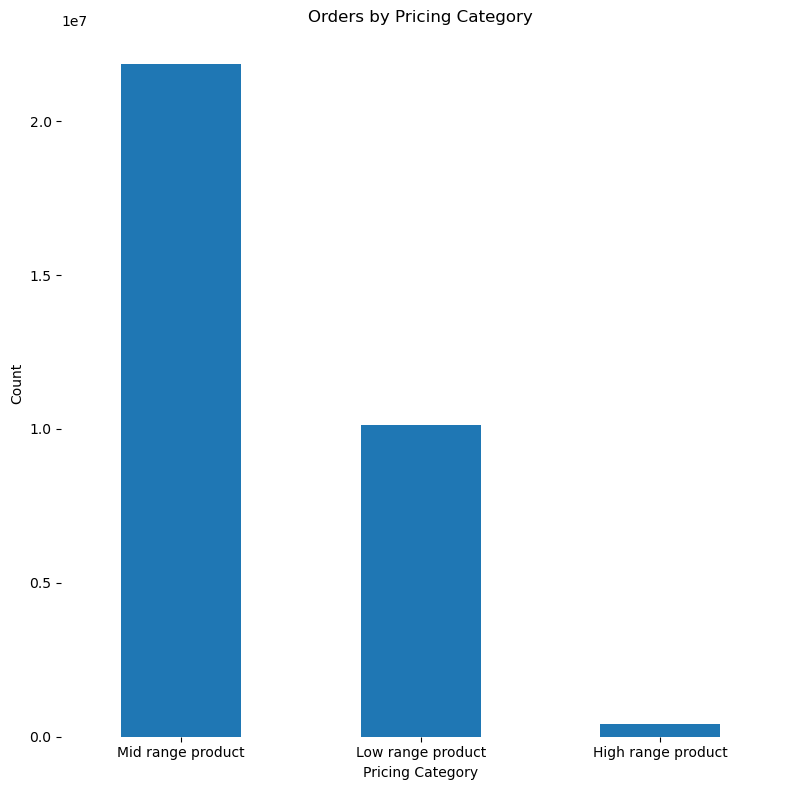

In [391]:
# Creating bar chart for price category
plt.figure(figsize=(8,8))
price_category_bar= df['price_range_loc'].value_counts().plot(kind='bar', rot=0)
plt.title('Orders by Pricing Category')
plt.xlabel('Pricing Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [393]:
price_category_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'price_category_bar.png'))

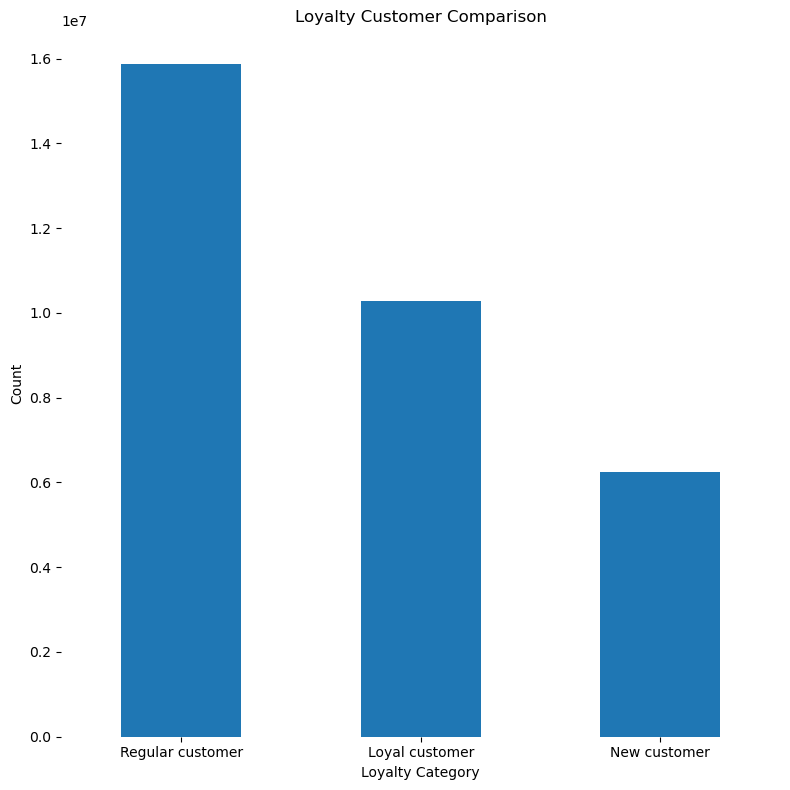

In [397]:
# Creating bar chart for customer loyalty breakdown
plt.figure(figsize=(8,8))
loyalty_customer_comparison_bar= df['loyalty_flag'].value_counts().plot(kind='bar', rot=0)
plt.title('Loyalty Customer Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [409]:
loyalty_customer_comparison_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_customer_comparison_bar.png'))

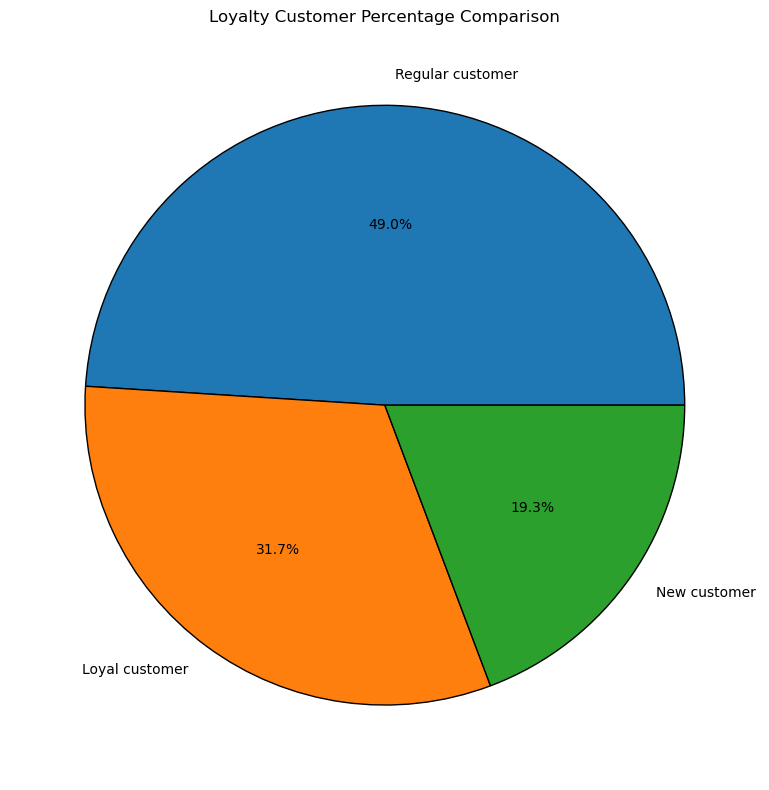

In [399]:
# Creating Pie Chart of customer loyalty breakdown
loyalty_customer_pie= df['loyalty_flag'].value_counts()
plt.figure(figsize=(8,8))
loyalty_customer_comparison_pie=loyalty_customer_pie.plot.pie(autopct='%.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Loyalty Customer Percentage Comparison')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [407]:
loyalty_customer_comparison_pie.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_customer_comparison_pie.png'))

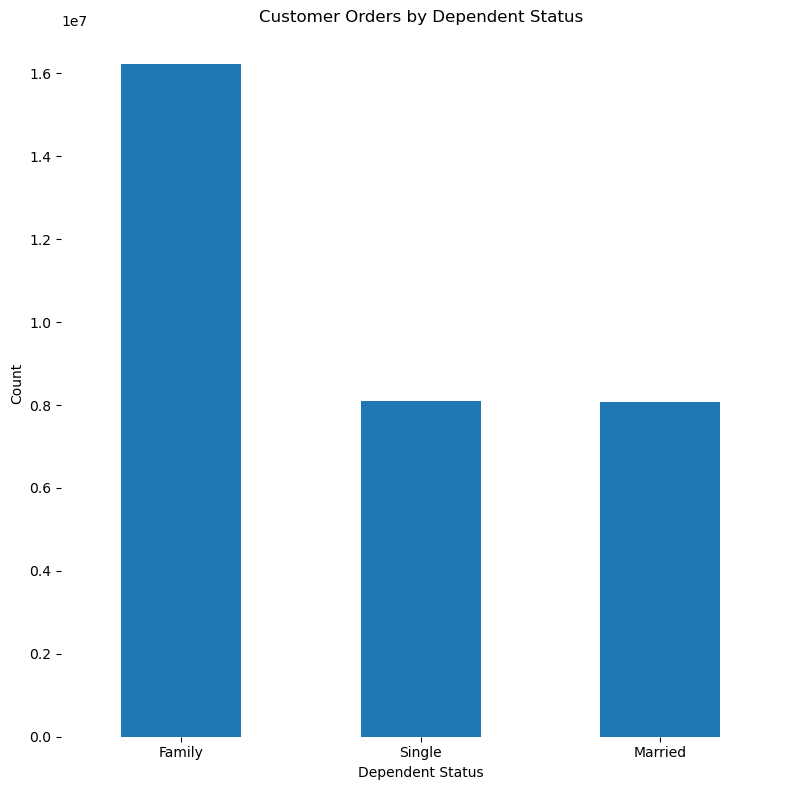

In [403]:
# Creating bar chart for customer marital status breakdown
plt.figure(figsize=(8,8))
dependent_status_comparison_bar= df['dependent_status'].value_counts().plot(kind='bar', rot=0)
plt.title('Customer Orders by Dependent Status')
plt.xlabel('Dependent Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [405]:
dependent_status_comparison_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependent_status_comparison_bar.png'))

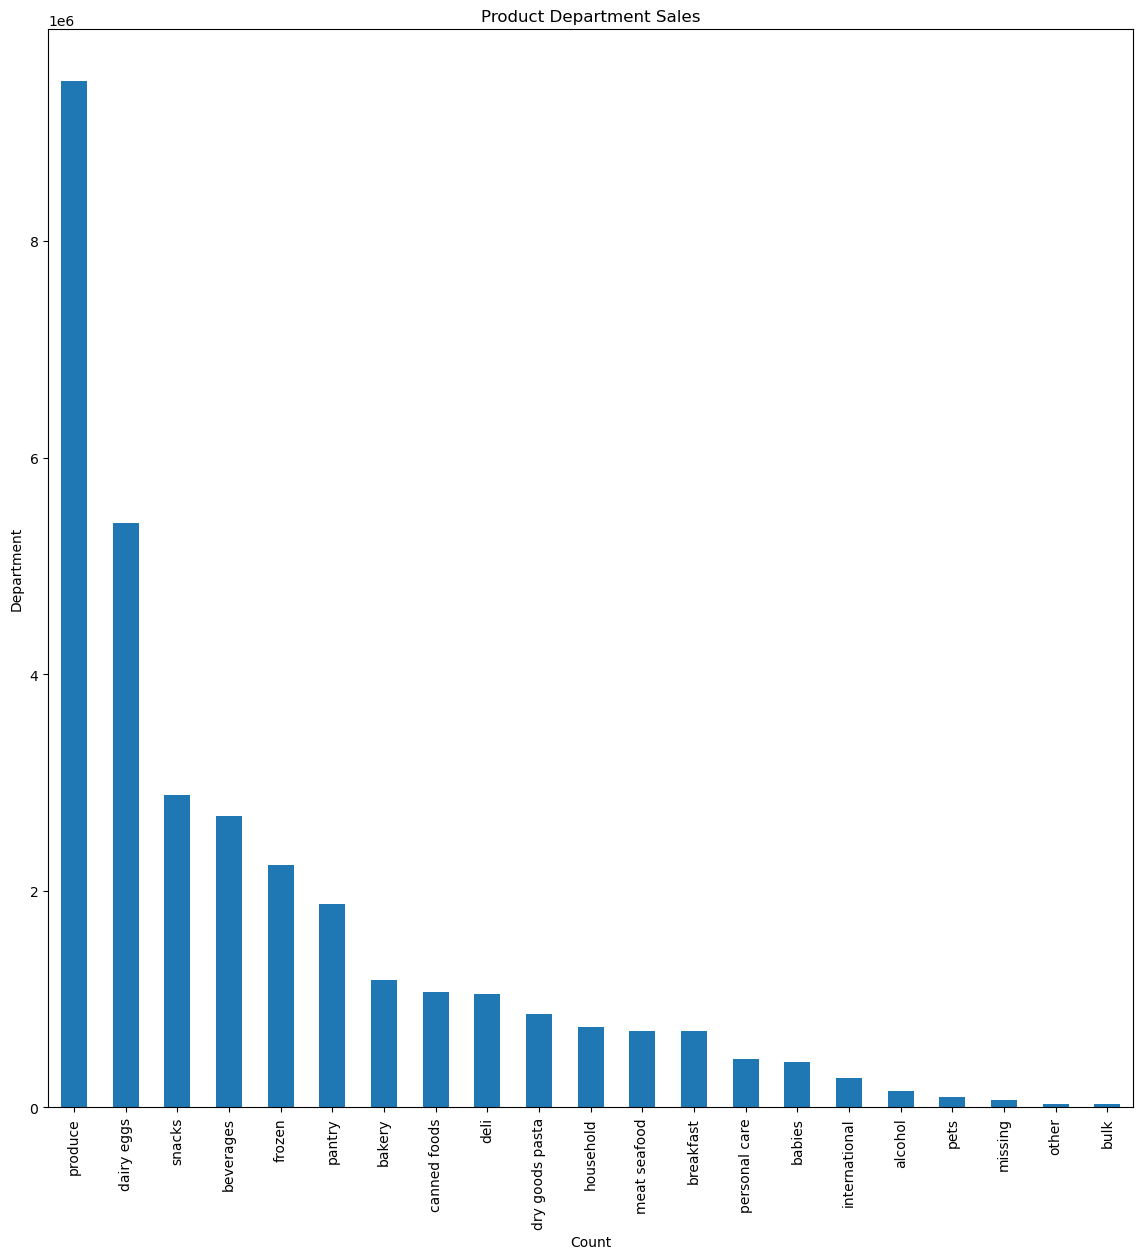

In [425]:
plt.figure(figsize=(14,14))
product_department_sales_bar = df['department'].value_counts(ascending=False).plot(kind='bar', figsize= (14,14))
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Product Department Sales')
plt.show()

In [427]:
product_department_sales_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'product_department_sales_bar.png'))

In [219]:
df['frequency_flag'].value_counts()

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: count, dtype: int64

In [223]:
age_group_by_cust_freq = pd.crosstab(df['age_group'], df['frequency_flag'], dropna = True)
age_group_by_cust_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Middle-aged,10123563,1712640,3410960
Senior,7376677,1241537,2449036
Young-adult,4059613,682260,1348568


<Figure size 1000x700 with 0 Axes>

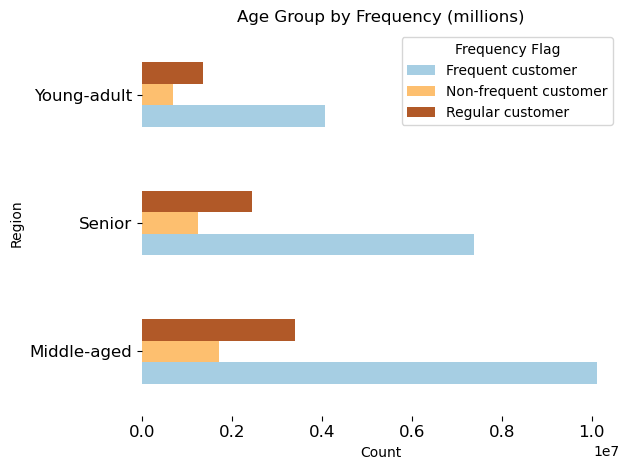

In [229]:
plt.figure(figsize =(10,7))

age_group_by_cust_freq_bar = age_group_by_cust_freq.plot(kind = 'barh', colormap = 'Paired')

plt.title('Age Group by Frequency (millions)')
plt.xlabel('Count')
plt.ylabel('Region')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.legend(title='Frequency Flag')

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

In [231]:
age_group_by_cust_freq_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_by_cust_freq_bar.png'))

In [347]:
df.columns.to_list()

['user_id',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'family_status',
 'income',
 'product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'first_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_orders',
 'loyalty_flag',
 'average_spend',
 'spending_flag',
 'customer_frequency',
 'frequency_flag',
 '_merge',
 'age_group',
 'income_group',
 'dependent_status',
 'day_of_week_name',
 'hour_of_day_group',
 'week_category',
 'department',
 'region']

In [349]:
age_group_loyalty = pd.crosstab(df['age_group'], df['loyalty_flag'])
age_group_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
Middle-aged,4856063,2927993,7463107
Senior,3514773,2142726,5409756
Young-adult,1913257,1173271,3003913


<Figure size 1000x700 with 0 Axes>

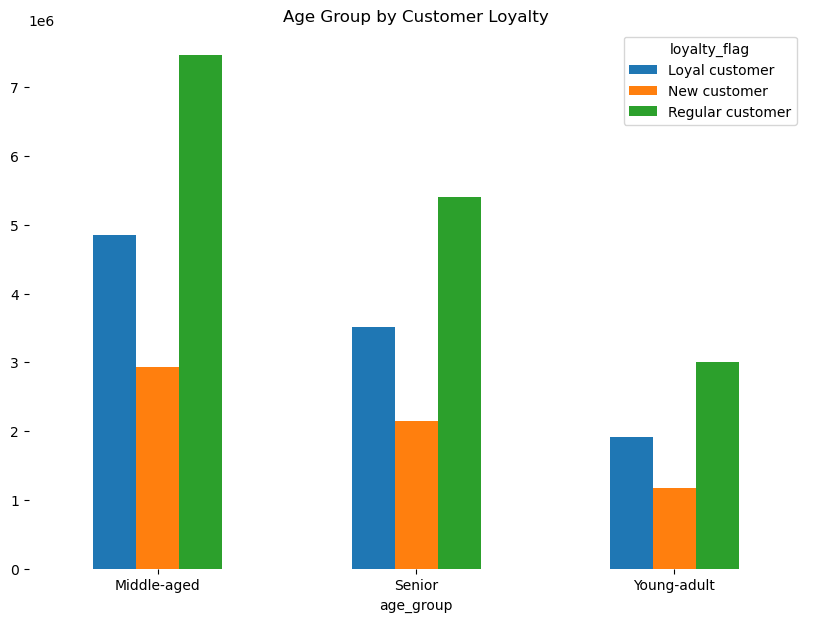

In [355]:
plt.figure(figsize=(10,7))
age_group_loyalty_bar = age_group_loyalty.plot(kind = 'bar', figsize = (10,7), rot=0)

plt.title('Age Group by Customer Loyalty')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [357]:
age_group_loyalty_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'age_group_loyalty_bar.png'))

In [429]:
loyalty_spending = pd.crosstab(df['loyalty_flag'], df['spending_flag'])
loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,114699,6129291
Regular customer,302814,15573962


<Figure size 1000x700 with 0 Axes>

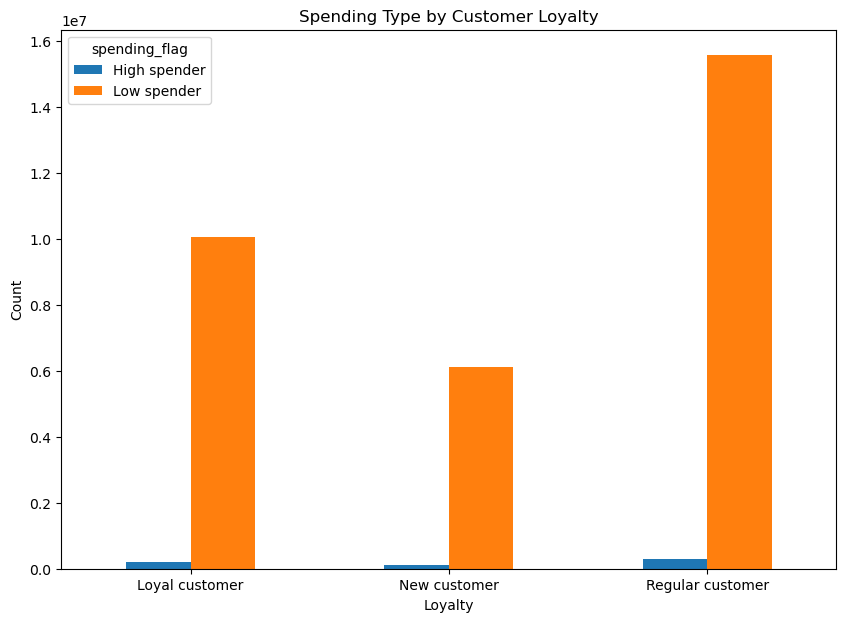

In [437]:
plt.figure(figsize=(10,7))
loyalty_spending_bar = loyalty_spending.plot(kind = 'bar', rot=0, figsize = (10,7))

plt.title('Spending Type by Customer Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.show()

In [439]:
loyalty_spending_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_spending_bar.png'))

### 10. Export Final Dataset

In [412]:
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'final_data_set.pkl'))